In [133]:
# 1. 데이터 정제: 데이터 기초통계 확인 및 결측치 제거

In [135]:
import pandas as pd

In [137]:
df = pd.read_csv('superstore.csv')
df

df.drop(columns = ['记录数'], inplace=True)

In [139]:
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [141]:
import pandas as pd

# 문자열을 datetime으로 변환
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

# 시간 차이 계산
df['Shipping.Duration'] = df['Ship.Date'] - df['Order.Date']
df['Shipping.Duration.Days'] = df['Shipping.Duration'].dt.days

# 결과 출력
df.head()

Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market Order.Date        Order.ID Order.Priority  ...  Ship.Date  \
0       0.0     US 2011-01-07  CA-2011-130813           High  ... 2011-01-09   
1       0.0     US 2011-01-21  CA-2011-148614         Medium  ... 2011-01-26   
2       0.0     US 2011-08-05  CA-2011-118962         Medium  ... 2011-08-09   
3       0.0     US 2011-08-05  CA-2011-118962         Medium  ... 2011-08-09   
4       0.0     US 2011-09-29  CA-2011-146969           High  ... 2011-10-03   

        Ship.Mode  Shipping.Cost       State Sub.Category  Year  \
0    Second Class           4.37  California        Paper  2011   
1  Standard Class           0.94  California        Paper  2011   
2  Standard Class           1.81  California        Paper  2011   
3  Standard Class           4.59  California        Paper  2011   
4  Standard Class           1.32  California        Paper  2011   

         Market2 weeknum Shipping.Duration Shipping.Duration.Days  
0  North America       2            2 days                      2  
1  North America       4            5 days                      5  
2  North America      32            4 days                      4  
3  North America      32            4 days                      4  
4  North America      40            4 days                      4  

[5 rows x 28 columns]

In [143]:
print(df.isnull().sum()) 

Category                  0
City                      0
Country                   0
Customer.ID               0
Customer.Name             0
Discount                  0
Market                    0
Order.Date                0
Order.ID                  0
Order.Priority            0
Product.ID                0
Product.Name              0
Profit                    0
Quantity                  0
Region                    0
Row.ID                    0
Sales                     0
Segment                   0
Ship.Date                 0
Ship.Mode                 0
Shipping.Cost             0
State                     0
Sub.Category              0
Year                      0
Market2                   0
weeknum                   0
Shipping.Duration         0
Shipping.Duration.Days    0
dtype: int64


In [145]:
#대륙별 마진율
market_margin = df.groupby('Market').apply(lambda x: x['Profit'].sum() / x['Sales'].sum()).reset_index(name='Margin Rate')
print(market_margin)


   Market  Margin Rate
0    APAC     0.121590
1  Africa     0.113389
2  Canada     0.266201
3    EMEA     0.054452
4      EU     0.126893
5   LATAM     0.102391
6      US     0.124664


In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

superstar_sales = pd.read_csv('superstore.csv')
superstar_sales
df = superstar_sales.copy()

In [149]:
df = superstar_sales.copy()
df.shape

(51290, 27)

In [153]:
df[['Sales','Discount','Profit','Quantity']].describe()

Sales      Discount        Profit      Quantity
count  51290.000000  51290.000000  51290.000000  51290.000000
mean     246.498440      0.142908     28.610982      3.476545
std      487.567175      0.212280    174.340972      2.278766
min        0.000000      0.000000  -6599.978000      1.000000
25%       31.000000      0.000000      0.000000      2.000000
50%       85.000000      0.000000      9.240000      3.000000
75%      251.000000      0.200000     36.810000      5.000000
max    22638.000000      0.850000   8399.976000     14.000000

In [240]:
df['Country'].value_counts()

Country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
South Sudan         2
Chad                2
Swaziland           2
Eritrea             2
Bahrain             2
Name: count, Length: 147, dtype: int64

In [242]:
df['Market'].value_counts()

Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64

In [70]:
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum', 'Shipping.Duration',
       'Shipping.Duration.Days'],
      dtype='object')

In [159]:
#이익 마진 분석에 사용할 칼럼 선택
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

superstar_sales = pd.read_csv('superstore.csv')
superstar_sales
df = superstar_sales.copy()

df_sales_margin = df[['Sales', 'Country', 'Profit', 'Market']].copy()

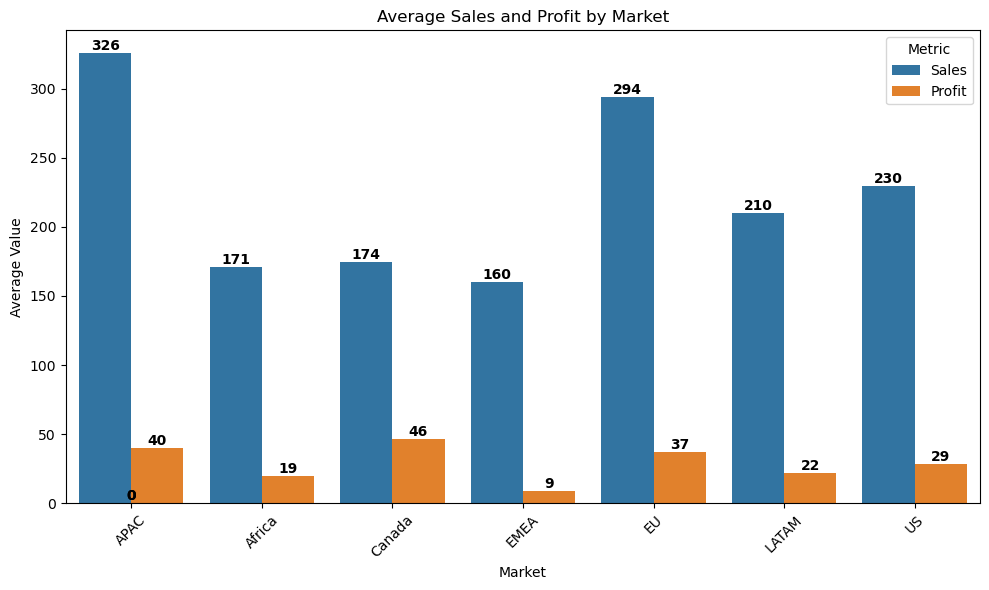

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped_data = df_sales_margin.groupby('Market')[['Sales', 'Profit']].mean().reset_index()
melted_data = grouped_data.melt(id_vars='Market', var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted_data, x='Market', y='Value', hue='Metric')

# 각 바 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',   # 소수점 둘째 자리까지 표시
                (p.get_x() + p.get_width() / 2., p.get_height()),  # x, y 위치 조정
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.title('Average Sales and Profit by Market')
plt.ylabel('Average Value')
plt.xlabel('Market')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

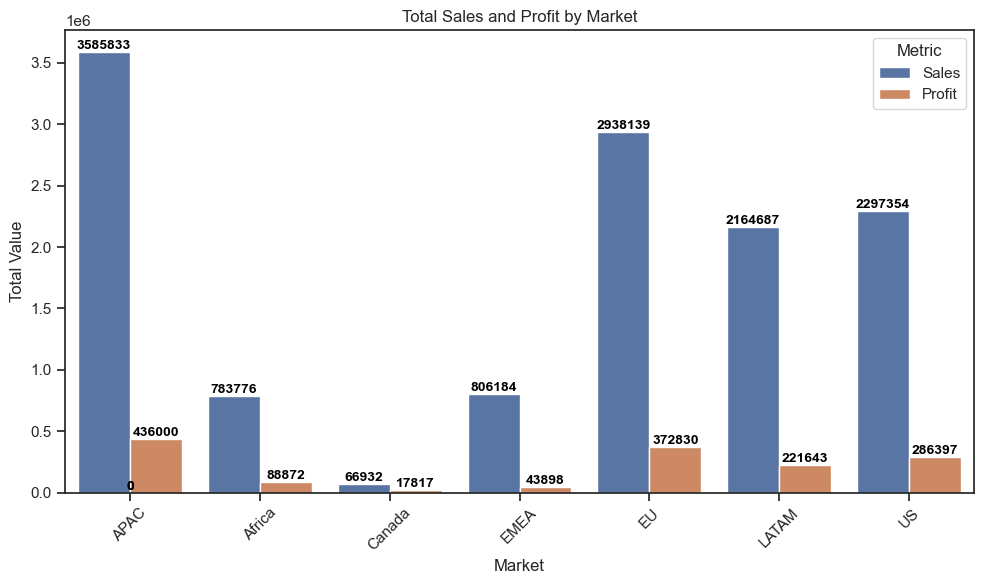

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped_data = df.groupby('Market')[['Sales', 'Profit']].sum().reset_index()
melted_data = grouped_data.melt(id_vars='Market', var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted_data, x='Market', y='Value', hue='Metric')

# 각 바 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',   # 소수점 둘째 자리까지 표시
                (p.get_x() + p.get_width() / 2., p.get_height()),  # x, y 위치 조정
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.title('Total Sales and Profit by Market')
plt.ylabel('Total Value')
plt.xlabel('Market')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

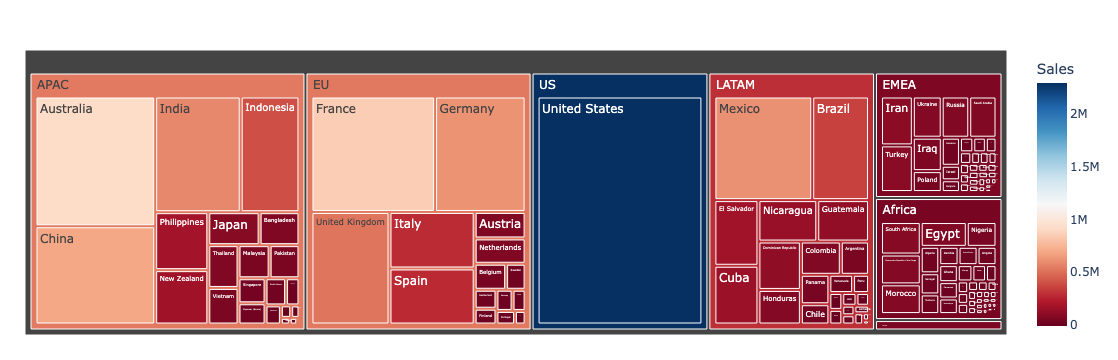

In [297]:
#판매액 기준 트리맵 - 미국 포함 
import plotly.express as px
import numpy as np
temp = df[['Market','Country','Sales']].groupby(['Market','Country'])['Sales'].sum().reset_index()
fig = px.treemap(temp,path=['Market','Country'], values='Sales',
                  color='Sales', hover_data=['Market','Country','Sales'], color_continuous_scale='RdBu')

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
#color_discrete_sequence = px.colors.qualitative.Plotly)fig.data[0].textinfo = 'label+text+value'fig.show()

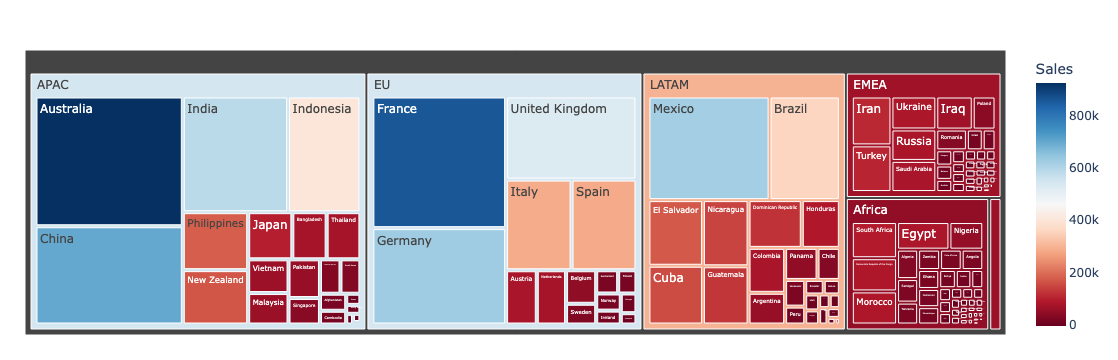

In [317]:
#판매액 기준 트리맵 - 미국 제외
import plotly.express as px
import numpy as np

temp2 = df[df['Market'] != 'US'][['Market','Country','Sales']].groupby(['Market','Country'])['Sales'].sum().reset_index()

fig = px.treemap(temp2,path=['Market','Country'], values='Sales',
                  color='Sales', hover_data=['Market','Country','Sales'], color_continuous_scale='RdBu')

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
#color_discrete_sequence = px.colors.qualitative.Plotly)fig.data[0].textinfo = 'label+text+value'fig.show()

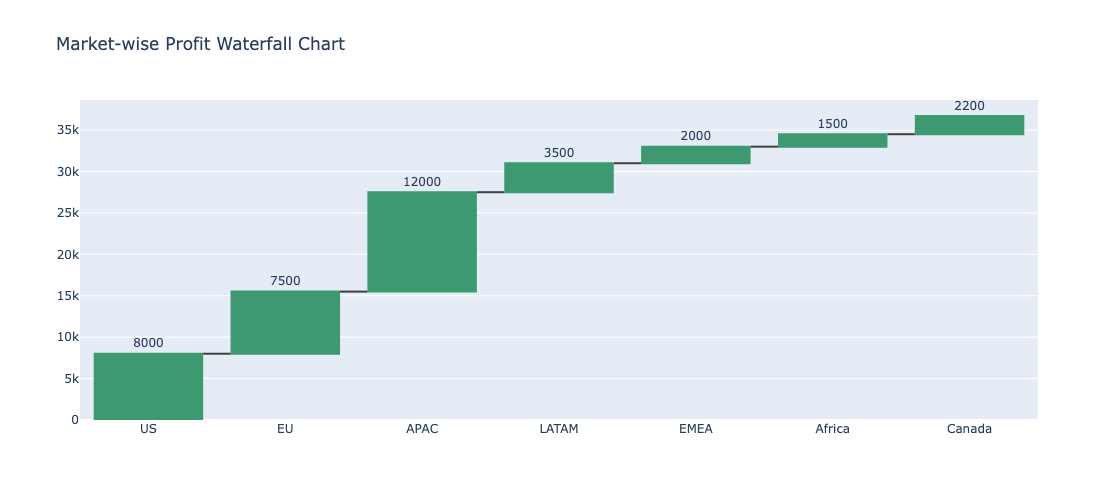

In [39]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    x=df['Market'],
    y=df['Profit'],
    text=df['Profit'],
    textposition="outside",
    connector={"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(title="Market-wise Profit Waterfall Chart",
                  width=700, height=500)

fig.show()


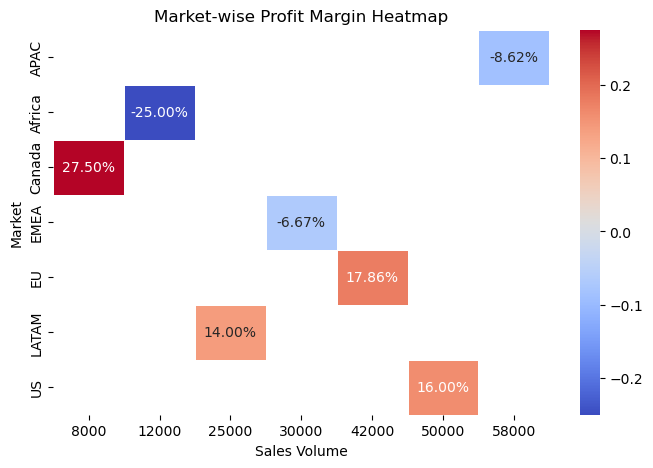

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Profit % 계산
df['Profit Margin'] = df['Profit'] / df['Sales']

# Heatmap 데이터 변환
heatmap_data = df.pivot(index='Market', columns='Sales', values='Profit Margin')

# 히트맵 그리기
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".2%", cmap="coolwarm", linewidths=0.5)
plt.title("Market-wise Profit Margin Heatmap")
plt.xlabel("Sales Volume")
plt.ylabel("Market")
plt.show()


In [343]:
df = superstar_sales.copy()
print(df.columns)

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')


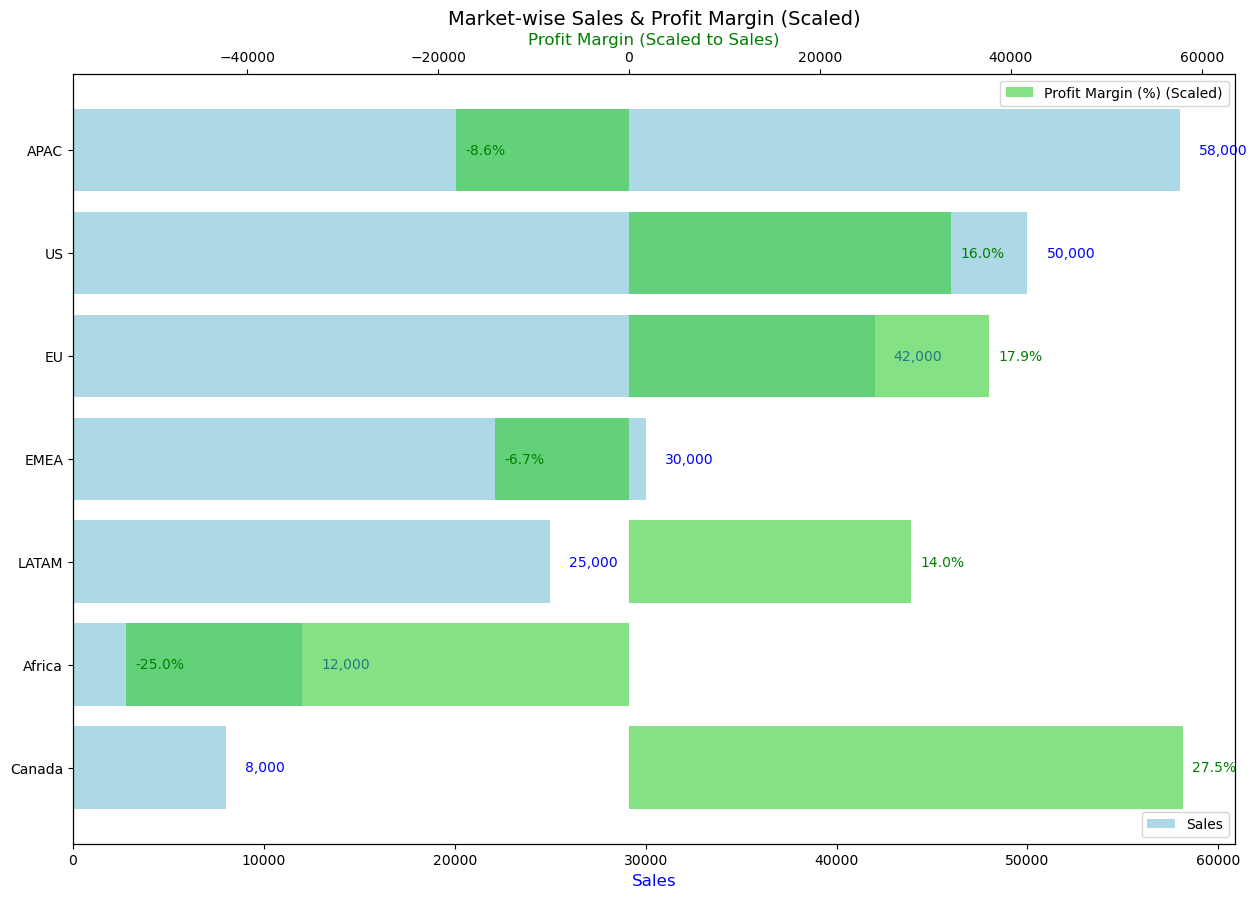

In [87]:
import matplotlib.pyplot as plt
import numpy as np

df_sorted = df.sort_values('Sales', ascending=True)

fig, ax1 = plt.subplots(figsize=(15, 10))

# 🔹 Profit Margin 정규화 (Sales 최대값 기준)
max_sales = df_sorted['Sales'].max()
df_sorted['Profit Margin (Scaled)'] = df_sorted['Profit Margin'] * (max_sales / df_sorted['Profit Margin'].max())

# 첫 번째 축 (Sales 막대)
ax1.barh(df_sorted['Market'], df_sorted['Sales'], color='lightblue', label="Sales")
ax1.set_xlabel("Sales", fontsize=12, color='blue')

# 두 번째 축 (정규화된 Profit Margin % 막대)
ax2 = ax1.twiny()  # x축을 공유하는 새로운 축 생성
ax2.barh(df_sorted['Market'], df_sorted['Profit Margin (Scaled)'], color='limegreen', alpha=0.6, label="Profit Margin (%) (Scaled)")
ax2.set_xlabel("Profit Margin (Scaled to Sales)", fontsize=12, color='green')

# 라벨 추가 (원래 Profit Margin 값 표시)
for i, (sales, margin) in enumerate(zip(df_sorted['Sales'], df_sorted['Profit Margin'])):
    ax1.text(sales + 1000, df_sorted['Market'].iloc[i], f'{sales:,}', va='center', fontsize=10, color='blue')
    ax2.text(df_sorted['Profit Margin (Scaled)'].iloc[i] + 1000, df_sorted['Market'].iloc[i], f'{margin:.1f}%', va='center', fontsize=10, color='green')

# 범례 추가
ax1.legend(loc="lower right")
ax2.legend(loc="upper right")

plt.title("Market-wise Sales & Profit Margin (Scaled)", fontsize=14)
plt.show()


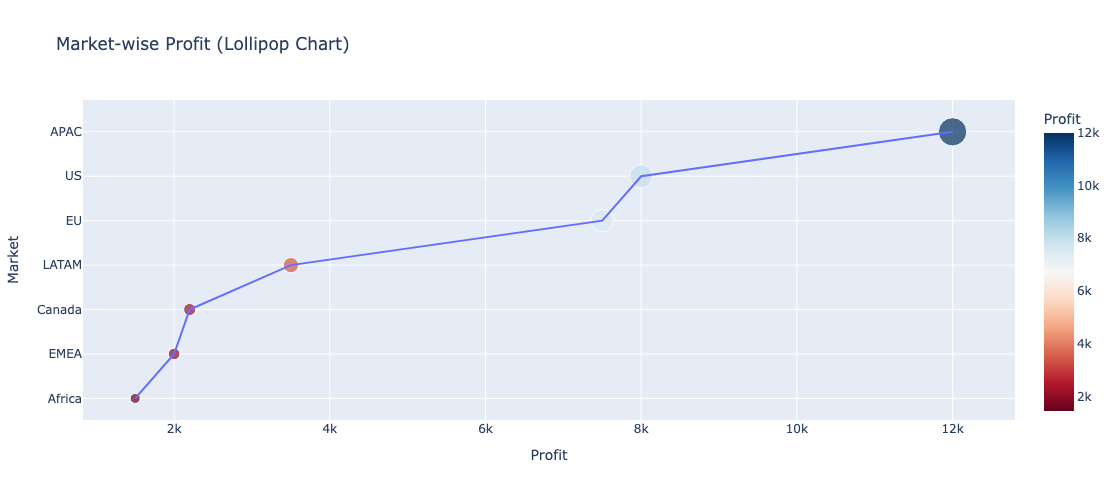

In [49]:
import plotly.express as px

# 데이터 준비
df_sorted = df.sort_values('Profit')  # 손실이 큰 Market이 먼저 나오도록 정렬

# 막대 + 점 그래프 (Lollipop Chart)
fig = px.scatter(df_sorted, 
                 x='Profit', y='Market', 
                 size=np.abs(df_sorted['Profit']),  
                 color=df_sorted['Profit'], 
                 color_continuous_scale='RdBu', 
                 title="Market-wise Profit (Lollipop Chart)")

# 선 추가 (막대 형태)
fig.add_trace(px.line(df_sorted, x='Profit', y='Market').data[0])

fig.update_layout(width=800, height=500)

fig.show()


In [464]:
#Market(시장)별로 Profit이 음수 주문 평균 확인

df['Profit_Negative'] = df['Profit'] < 0  # Profit이 음수면 True
market_negative_profit = df.groupby('Market')['Profit_Negative'].mean() * 100
print(market_negative_profit)

Market
APAC      29.276495
Africa    22.454763
Canada     0.000000
EMEA      31.934778
EU        21.180000
LATAM     26.209442
US        18.721233
Name: Profit_Negative, dtype: float64


In [470]:
grouped = df.groupby('Market')[['Discount', 'Profit']].mean()
print(grouped)

        Discount     Profit
Market                     
APAC    0.148839  39.629163
Africa  0.156704  19.374674
Canada  0.000000  46.399453
EMEA    0.196083   8.728966
EU      0.103105  37.282974
LATAM   0.135531  21.531328
US      0.156203  28.656896


In [478]:
df_filtered = df[df['Sales'] > 0].copy()  # Sales > 0인 경우만 필터링
df_filtered['Profit_Ratio'] = df_filtered['Profit'] / df_filtered['Sales'] * 100  # 이익률 재계산

# 마켓별 평균 및 중앙값
df_filtered.groupby('Market')['Profit_Ratio'].agg(['mean', 'median']).round(2)

mean  median
Market               
APAC     6.95   12.99
Africa -14.51   17.00
Canada  24.74   24.78
EMEA   -14.16   12.82
EU      11.02   17.76
LATAM    6.17   14.00
US      12.02   27.00

   Market  Customer Count  Order Count  Sales Sum    Profit Sum  \
0    APAC             796         5437    3585833  436000.04900   
1  Africa             754         2232     783776   88871.63100   
2  Canada             181          201      66932   17817.39000   
3    EMEA             760         2462     806184   43897.97100   
4      EU             795         4593    2938139  372829.74150   
5   LATAM             794         5138    2164687  221643.48708   
6      US             793         5009    2297354  286397.02170   

   Orders per Customer  Sales per Customer  Profit per Customer  Profit/Sales  \
0             6.830402         4504.815327           547.738755      0.121590   
1             2.960212         1039.490716           117.866885      0.113389   
2             1.110497          369.790055            98.438619      0.266201   
3             3.239474         1060.768421            57.760488      0.054452   
4             5.777358         3695.772327           468.9

/var/folders/fx/rqk8wdgj45ldb079prqv9mtw0000gn/T/ipykernel_23132/748898800.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=market_stats, x='Customer Count', y='Market', ax=axes[0, 0], palette='coolwarm')
/var/folders/fx/rqk8wdgj45ldb079prqv9mtw0000gn/T/ipykernel_23132/748898800.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=market_stats, x='Order Count', y='Market', ax=axes[0, 1], palette='coolwarm')
/var/folders/fx/rqk8wdgj45ldb079prqv9mtw0000gn/T/ipykernel_23132/748898800.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.ba

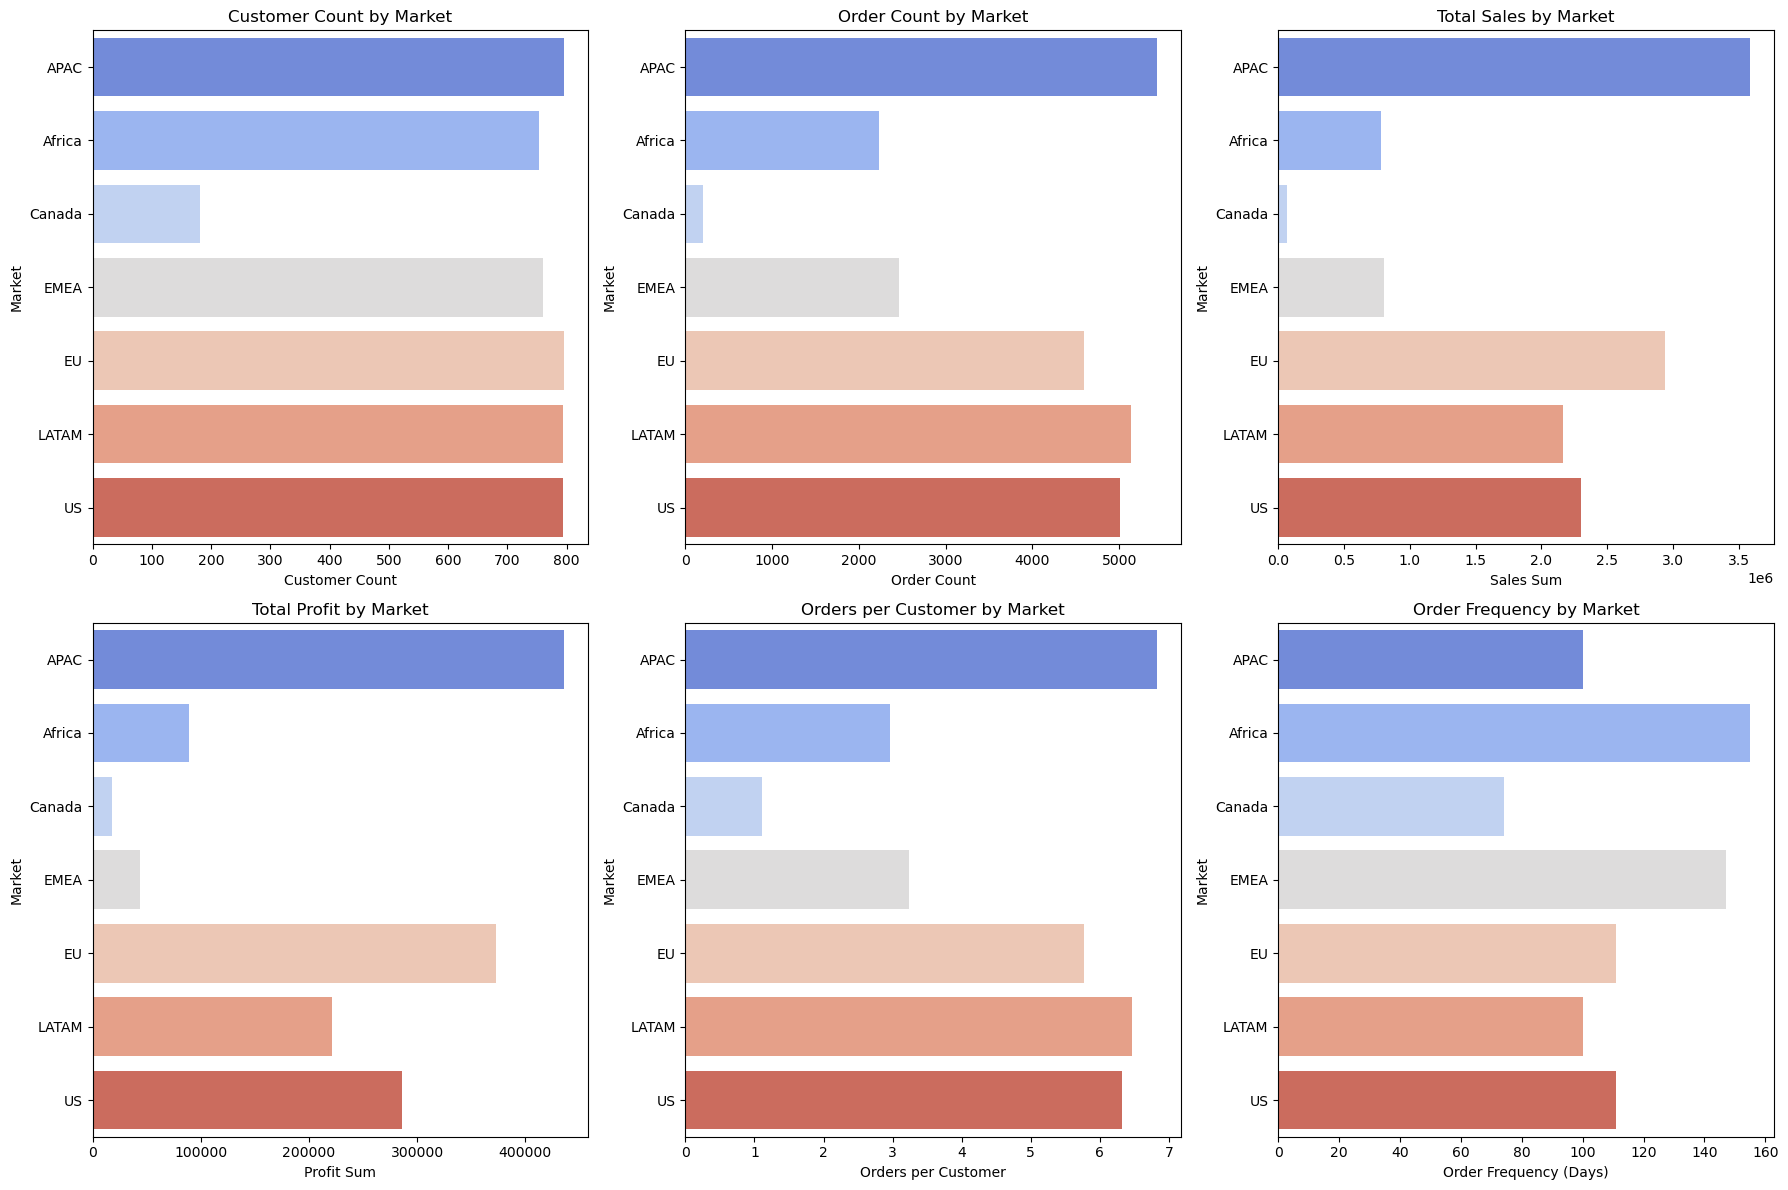

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('superstore.csv')
df_copy = df[['Market', 'Country', 'City', 'Category', 'Sub.Category', 'Sales', 'Quantity', 'Discount', 'Profit','Order.Date','Customer.ID','Order.ID']].copy()

# 대륙별 고객 수, 주문 수, 이익액, 매출액
customer_count = df_copy.groupby('Market')['Customer.ID'].nunique().reset_index()
customer_count.rename(columns={'Customer.ID': 'Customer Count'}, inplace=True)

order_count = df_copy.groupby('Market')['Order.ID'].nunique().reset_index()
order_count.rename(columns={'Order.ID': 'Order Count'}, inplace=True)

profit_amount = df_copy.groupby('Market')['Profit'].sum().reset_index() 
profit_amount.rename(columns={'Profit': 'Profit Sum'}, inplace=True)

sales_amount = df_copy.groupby('Market')['Sales'].sum().reset_index()
sales_amount.rename(columns={'Sales': 'Sales Sum'}, inplace=True)

# 국가별 고객 지표 통합
market_stats = pd.merge(customer_count, order_count, on='Market')
market_stats = pd.merge(market_stats, sales_amount, on='Market')
market_stats = pd.merge(market_stats, profit_amount, on='Market')

# 인당 주문 횟수 계산 (Order Count / Customer Count)
market_stats['Orders per Customer'] = market_stats['Order Count'] / market_stats['Customer Count']

# 인당 매출액 계산 (Sales / Customer Count)
market_stats['Sales per Customer'] = market_stats['Sales Sum'] / market_stats['Customer Count']

# 인당 이익액 계산 (Profit  / Customer Count)
market_stats['Profit per Customer'] = market_stats['Profit Sum'] / market_stats['Customer Count']

# 매출액 1달러 당 이익
market_stats['Profit/Sales'] = market_stats['Profit Sum'] / market_stats['Sales Sum']

# 주문 주기 (평균 주문 간격) 계산
df_copy['Order.Date'] = pd.to_datetime(df_copy['Order.Date'])
order_intervals = df_copy.groupby(['Market', 'Customer.ID'])['Order.Date'].agg(['min', 'max', 'count'])
order_intervals['Order Frequency (Days)'] = (order_intervals['max'] - order_intervals['min']) / (order_intervals['count'] - 1)
order_intervals = order_intervals.groupby('Market')['Order Frequency (Days)'].mean().reset_index()
order_intervals['Order Frequency (Days)'] = order_intervals['Order Frequency (Days)'].dt.days

# 통합 데이터프레임 만들기
market_stats = pd.merge(market_stats, order_intervals, on='Market', how='left')

# 분석 결과 출력
print(market_stats)

# 📊 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.barplot(data=market_stats, x='Customer Count', y='Market', ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Customer Count by Market')

sns.barplot(data=market_stats, x='Order Count', y='Market', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Order Count by Market')

sns.barplot(data=market_stats, x='Sales Sum', y='Market', ax=axes[0, 2], palette='coolwarm')
axes[0, 2].set_title('Total Sales by Market')

sns.barplot(data=market_stats, x='Profit Sum', y='Market', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Total Profit by Market')

sns.barplot(data=market_stats, x='Orders per Customer', y='Market', ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Orders per Customer by Market')

sns.barplot(data=market_stats, x='Order Frequency (Days)', y='Market', ax=axes[1, 2], palette='coolwarm')
axes[1, 2].set_title('Order Frequency by Market')

plt.tight_layout()
plt.show()

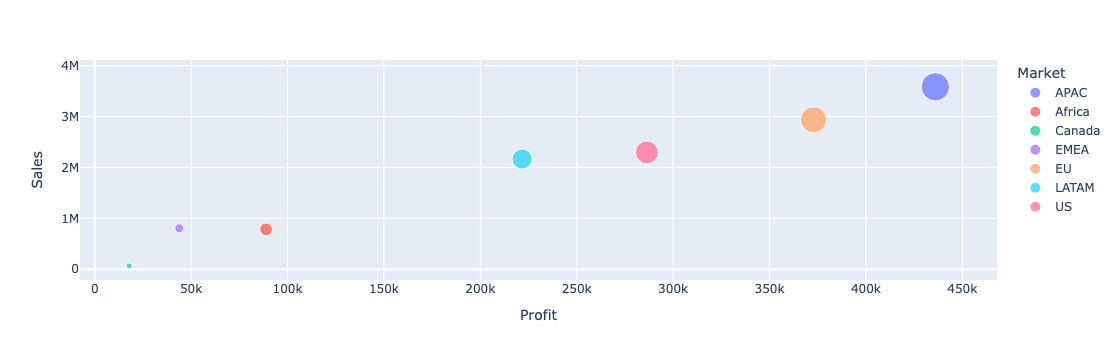

In [92]:
import plotly.express as px
df = pd.read_csv('superstore.csv')
df_copy = df[['Year', 'Market','Country', 'Sales', 'Profit', 'Discount']].copy()

# 그룹화하여 필요한 값 계산
state_sales_profit = df_copy.groupby('Market').sum().reset_index()  # 인덱스를 컬럼으로 되돌림

# 시각화
fig = px.scatter(state_sales_profit, x='Profit', y='Sales', color='Market', size='Profit', hover_data=['Sales'])
fig.show()

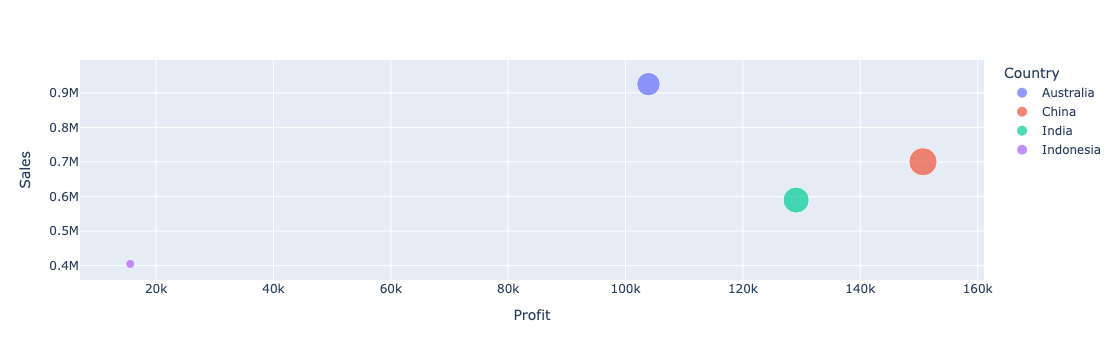

In [94]:
import plotly.express as px
df = pd.read_csv('superstore.csv')
df_copy = df[['Year', 'Market','Country', 'Sales', 'Profit', 'Discount']].copy()

apac_data = df_copy[df_copy['Market'] == 'APAC']

country_sales_profit_apac = apac_data.groupby('Country').sum().reset_index()  # 인덱스를 컬럼으로 되돌림

# 음수 Profit 값을 0으로 설정
country_sales_profit_apac['Profit'] = country_sales_profit_apac['Profit'].clip(lower=0)

top_4_countries = country_sales_profit_apac.nlargest(4, 'Sales')

# 시각화
fig = px.scatter(top_4_countries, x='Profit', y='Sales', color='Country', size='Profit', hover_data=['Sales'])
fig.show()


             Country  Customer Count  Order Count  Sales Sum   Profit Sum  \
0        Afghanistan              25           26      21674    5460.3000   
1          Australia             660         1420     925257  103907.4330   
2         Bangladesh              76           82      78254   19430.8900   
3           Cambodia              21           21      17476    4476.5400   
4              China             549          925     700591  150683.0850   
5          Hong Kong               9            9       6148    1558.1100   
6              India             494          785     589664  129071.8350   
7          Indonesia             469          698     404887   15608.6779   
8              Japan             124          128     100789   24328.4670   
9           Malaysia              81           82      61363   16329.9600   
10          Mongolia               1            1         40     -17.0100   
11   Myanmar (Burma)              56           58      34144   -2109.2583   

/var/folders/fx/rqk8wdgj45ldb079prqv9mtw0000gn/T/ipykernel_23132/607457962.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_stats, x='Customer Count', y='Country', ax=axes[0, 0], palette='coolwarm')
/var/folders/fx/rqk8wdgj45ldb079prqv9mtw0000gn/T/ipykernel_23132/607457962.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_stats, x='Order Count', y='Country', ax=axes[0, 1], palette='coolwarm')
/var/folders/fx/rqk8wdgj45ldb079prqv9mtw0000gn/T/ipykernel_23132/607457962.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn

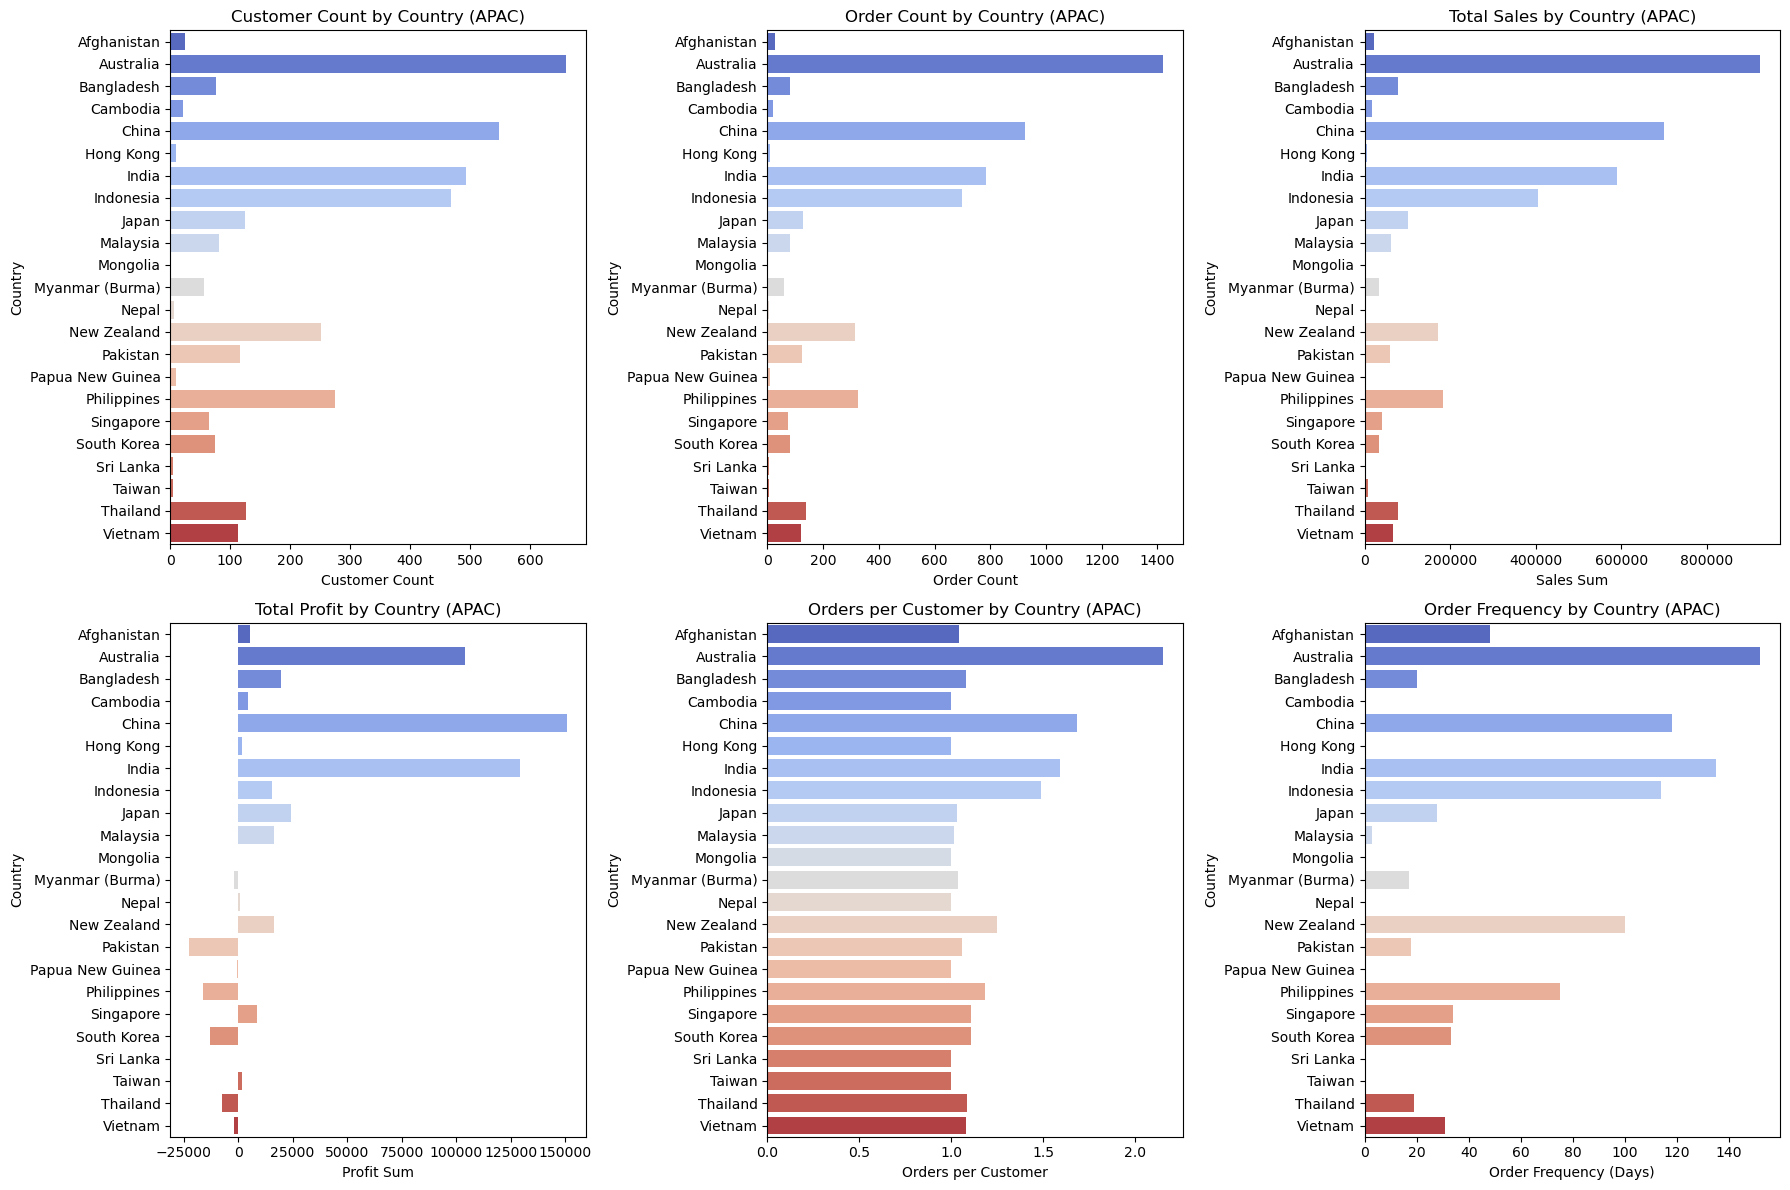

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# APAC 지역 데이터 필터링
df = pd.read_csv('superstore.csv')
df_apac = df[df['Market'] == 'APAC'].copy()

# 대륙별 고객 수, 주문 수, 이익액, 매출액
customer_count = df_apac.groupby('Country')['Customer.ID'].nunique().reset_index()
customer_count.rename(columns={'Customer.ID': 'Customer Count'}, inplace=True)

order_count = df_apac.groupby('Country')['Order.ID'].nunique().reset_index()
order_count.rename(columns={'Order.ID': 'Order Count'}, inplace=True)

profit_amount = df_apac.groupby('Country')['Profit'].sum().reset_index() 
profit_amount.rename(columns={'Profit': 'Profit Sum'}, inplace=True)

sales_amount = df_apac.groupby('Country')['Sales'].sum().reset_index()
sales_amount.rename(columns={'Sales': 'Sales Sum'}, inplace=True)

# 국가별 고객 지표 통합
country_stats = pd.merge(customer_count, order_count, on='Country')
country_stats = pd.merge(country_stats, sales_amount, on='Country')
country_stats = pd.merge(country_stats, profit_amount, on='Country')

# 인당 주문 횟수 계산 (Order Count / Customer Count)
country_stats['Orders per Customer'] = country_stats['Order Count'] / country_stats['Customer Count']

# 인당 매출액 계산 (Sales / Customer Count)
country_stats['Sales per Customer'] = country_stats['Sales Sum'] / country_stats['Customer Count']

# 인당 이익액 계산 (Profit  / Customer Count)
country_stats['Profit per Customer'] = country_stats['Profit Sum'] / country_stats['Customer Count']

# 매출액 1달러 당 이익
country_stats['Profit/Sales'] = country_stats['Profit Sum'] / country_stats['Sales Sum']

# 주문 주기 (평균 주문 간격) 계산
df_apac['Order.Date'] = pd.to_datetime(df_apac['Order.Date'])
order_intervals = df_apac.groupby(['Country', 'Customer.ID'])['Order.Date'].agg(['min', 'max', 'count'])
order_intervals['Order Frequency (Days)'] = (order_intervals['max'] - order_intervals['min']) / (order_intervals['count'] - 1)
order_intervals = order_intervals.groupby('Country')['Order Frequency (Days)'].mean().reset_index()
order_intervals['Order Frequency (Days)'] = order_intervals['Order Frequency (Days)'].dt.days

# 통합 데이터프레임 만들기
country_stats = pd.merge(country_stats, order_intervals, on='Country', how='left')

# 분석 결과 출력
print(country_stats)

# 📊 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.barplot(data=country_stats, x='Customer Count', y='Country', ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Customer Count by Country (APAC)')

sns.barplot(data=country_stats, x='Order Count', y='Country', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Order Count by Country (APAC)')

sns.barplot(data=country_stats, x='Sales Sum', y='Country', ax=axes[0, 2], palette='coolwarm')
axes[0, 2].set_title('Total Sales by Country (APAC)')

sns.barplot(data=country_stats, x='Profit Sum', y='Country', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Total Profit by Country (APAC)')

sns.barplot(data=country_stats, x='Orders per Customer', y='Country', ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Orders per Customer by Country (APAC)')

sns.barplot(data=country_stats, x='Order Frequency (Days)', y='Country', ax=axes[1, 2], palette='coolwarm')
axes[1, 2].set_title('Order Frequency by Country (APAC)')

plt.tight_layout()
plt.show()


/var/folders/fx/rqk8wdgj45ldb079prqv9mtw0000gn/T/ipykernel_22588/2694601829.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


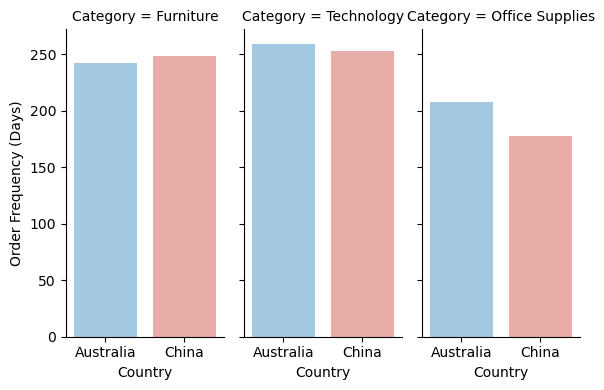

In [19]:
df = pd.read_csv('superstore.csv')
aus_china = df[df['Country'].isin(['Australia', 'China'])].copy()  # 호주, 중국 필터링

# 카테고리별 고객 수, 주문 수, 이익액, 매출액
customer_count = aus_china.groupby(['Country', 'Category'])['Customer.ID'].nunique().reset_index()
customer_count.rename(columns={'Customer.ID': 'Customer Count'}, inplace=True)

order_count = aus_china.groupby(['Country', 'Category'])['Order.ID'].nunique().reset_index()
order_count.rename(columns={'Order.ID': 'Order Count'}, inplace=True)

profit_amount = aus_china.groupby(['Country', 'Category'])['Profit'].sum().reset_index()
profit_amount.rename(columns={'Profit': 'Profit Sum'}, inplace=True)

sales_amount = aus_china.groupby(['Country', 'Category'])['Sales'].sum().reset_index()
sales_amount.rename(columns={'Sales': 'Sales Sum'}, inplace=True)

# 국가 및 카테고리별 고객 지표 통합
category_stats = pd.merge(customer_count, order_count, on=['Country', 'Category'])
category_stats = pd.merge(category_stats, sales_amount, on=['Country', 'Category'])
category_stats = pd.merge(category_stats, profit_amount, on=['Country', 'Category'])

# 인당 주문 횟수 계산 (Order Count / Customer Count)
category_stats['Orders per Customer'] = category_stats['Order Count'] / category_stats['Customer Count']

# 인당 매출액 계산 (Sales / Customer Count)
category_stats['Sales per Customer'] = category_stats['Sales Sum'] / category_stats['Customer Count']

# 인당 이익액 계산 (Profit  / Customer Count)
category_stats['Profit per Customer'] = category_stats['Profit Sum'] / category_stats['Customer Count']

# 매출액 1달러 당 이익
category_stats['Profit/Sales'] = category_stats['Profit Sum'] / category_stats['Sales Sum']

# 주문 주기 (평균 주문 간격) 계산
aus_china['Order.Date'] = pd.to_datetime(aus_china['Order.Date'])
order_intervals = aus_china.groupby(['Country', 'Category', 'Customer.ID'])['Order.Date'].agg(['min', 'max', 'count'])
order_intervals['Order Frequency (Days)'] = (order_intervals['max'] - order_intervals['min']) / (order_intervals['count'] - 1)
order_intervals = order_intervals.groupby(['Country', 'Category'])['Order Frequency (Days)'].mean().reset_index()
order_intervals['Order Frequency (Days)'] = order_intervals['Order Frequency (Days)'].dt.days

# 통합 데이터프레임 만들기
category_stats = pd.merge(category_stats, order_intervals, on=['Country', 'Category'], how='left')

category_stats

import plotly.express as px

import matplotlib.pyplot as plt

# 카테고리 순서 지정
category_order = ['Furniture', 'Technology', 'Office Supplies']
import seaborn as sns
import matplotlib.pyplot as plt

# 색상 설정 (RGB 색상을 튜플로 변환하여 투명도 추가 가능)
color_map = {"China": "#E74C3C", "Australia": "#3498DB"}
alpha_value = 0.5  # 투명도 (0: 완전 투명, 1: 불투명)

# 막대 그래프 생성
g = sns.catplot(
    data=category_stats, kind="bar",
    x="Country", y="Order Frequency (Days)", col="Category",
    height=4, aspect=0.5, palette=color_map, 
    col_order=category_order
)

# 각 subplot에서 모든 막대에 대해 투명도 설정
for ax in g.axes.flat:  # FacetGrid 내의 모든 subplot 반복
    for patch in ax.patches:  # subplot 내의 모든 막대 그래프
        patch.set_alpha(alpha_value)  # 투명도 적용

# 그래프 출력
plt.show()


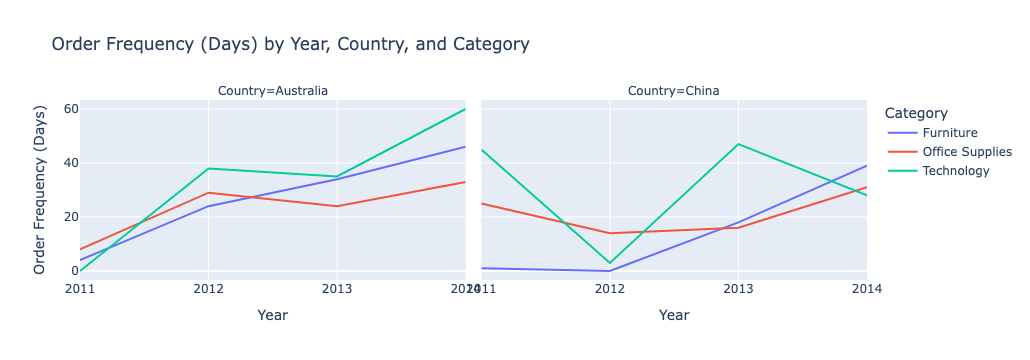

Year    Country         Category  Discount     Profit   Sales  Order.ID  \
0   2011  Australia        Furniture  0.130435   2714.913   51839        92   
1   2011  Australia  Office Supplies  0.135685   6697.407   37287       241   
2   2011  Australia       Technology  0.132979   8104.410   48460        94   
3   2011      China        Furniture  0.045783   9041.133   63223        83   
4   2011      China  Office Supplies  0.019139   8199.750   37183       209   
5   2011      China       Technology  0.000000  15940.500   55295        73   
6   2012  Australia        Furniture  0.146269   6530.076   80404       134   
7   2012  Australia  Office Supplies  0.141787   6460.335   50167       347   
8   2012  Australia       Technology  0.124306  12538.311   73389       144   
9   2012      China        Furniture  0.027778   7661.403   41864        72   
10  2012      China  Office Supplies  0.004115   7803.540   32842       243   
11  2012      China       Technology  0.016854  10768.830   55528        89   
12  2013  Australia        Furniture  0.152532   7043.817   98004       158   
13  2013  Australia  Office Supplies  0.145475   9353.886   72041       453   
14  2013  Australia       Technology  0.137500  12434.076   98925       184   
15  2013      China        Furniture  0.024031  16824.135   86486       129   
16  2013      China  Office Supplies  0.005474  10989.045   40031       274   
17  2013      China       Technology  0.014706  16660.755   69164       102   
18  2014  Australia        Furniture  0.156132   8410.032  108998       212   
19  2014  Australia  Office Supplies  0.143739   8969.463   86302       567   
20  2014  Australia       Technology  0.158294  14650.707  119441       211   
21  2014      China        Furniture  0.043478  12588.249   85044       138   
22  2014      China  Office Supplies  0.007375  12730.725   50398       339   
23  2014      China       Technology  0.000000  21475.020   83533       129   

    Customer.ID  Order Frequency (Days)  
0            92                       4  
1           241                       8  
2            94                       0  
3            83                       1  
4           209                      25  
5            73                      45  
6           134                      24  
7           347                      29  
8           144                      38  
9            72                       0  
10          243                      14  
11           89                       3  
12          158                      34  
13          453                      24  
14          184                      35  
15          129                      18  
16          274                      16  
17          102                      47  
18          212                      46  
19          567                      33  
20          211                      60  
21          138                      39  
22          339                      31  
23          129                      28

In [540]:
# Group by Year, Country, and Category to calculate stats
aus_china_sp = aus_china.groupby(['Year','Country', 'Category']).agg({
        'Discount': 'mean',
        'Profit': 'sum',
        'Sales': 'sum',
        'Order.ID': 'count',
        'Customer.ID':'count'
    }).reset_index()
# Calculate Order Frequency per Customer (considering Year and Category)
aus_china['Order.Date'] = pd.to_datetime(aus_china['Order.Date'])
order_intervals = aus_china.groupby(['Year', 'Country', 'Category', 'Customer.ID'])['Order.Date'].agg(['min', 'max', 'count'])
order_intervals['Order Frequency (Days)'] = (order_intervals['max'] - order_intervals['min']) / (order_intervals['count'] - 1)
order_intervals = order_intervals.groupby(['Year', 'Country', 'Category'])['Order Frequency (Days)'].mean().reset_index()
order_intervals['Order Frequency (Days)'] = order_intervals['Order Frequency (Days)'].dt.days

# Merge the stats with order frequency
country_stats = pd.merge(aus_china_sp, order_intervals, on=['Year', 'Country', 'Category'], how='left')
country_stats

# 연도별, 나라별, 카테고리별 Order Frequency (Days)의 변화 (선 그래프)
fig = px.line(order_intervals, 
              x='Year', 
              y='Order Frequency (Days)', 
              color='Category', 
              facet_col='Country', 
              title='Order Frequency (Days) by Year, Country, and Category')

# 그래프 출력
fig.show()




In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))


# 주문 주기 (평균 주문 간격) 계산
aus_china['Order.Date'] = pd.to_datetime(aus_china['Order.Date'])
order_intervals = aus_china.groupby(['Country', 'Customer.ID'])['Order.Date'].agg(['min', 'max', 'count'])
order_intervals['Order Frequency (Days)'] = (order_intervals['max'] - order_intervals['min']) / (order_intervals['count'] - 1)
order_intervals = order_intervals.groupby('Country')['Order Frequency (Days)'].mean().reset_index()
order_intervals['Order Frequency (Days)'] = order_intervals['Order Frequency (Days)'].dt.days
 

sns.barplot(data=country_stats, x='Order Frequency (Days)', y='Market', ax=axes[1, 2], palette='coolwarm')
axes[1, 2].set_title('Order Frequency by Market')


In [ ]:
aus_china_sum = aus_china.groupby(['Discount', 'Category'])['Profit'].mean().reset_index()
sns.barplot(data=aus_china_sum, x='Discount', y='Profit', hue='Category'ㅠ)
plt.show()

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('superstore.csv')

# 필요한 칼럼 선택
df_copy = df[['Year', 'Country', 'Sales', 'Profit', 'Discount']].copy()

# 이익률 계산
df_copy['Profit_Ratio'] = df_copy['Profit'] / df_copy['Sales'] 

# Discount 여부 칼럼 추가 (0이면 'No Discount', 0보다 크면 'Has Discount')
df_copy['Has_Discount'] = df_copy['Discount'].apply(lambda x: 'No Discount' if x == 0 else 'Has Discount')

# 결과 확인
print(df_copy.head())


   Year        Country  Sales   Profit  Discount  Profit_Ratio Has_Discount
0  2011  United States     19   9.3312       0.0      0.491116  No Discount
1  2011  United States     19   9.2928       0.0      0.489095  No Discount
2  2011  United States     21   9.8418       0.0      0.468657  No Discount
3  2011  United States    111  53.2608       0.0      0.479827  No Discount
4  2011  United States      6   3.1104       0.0      0.518400  No Discount


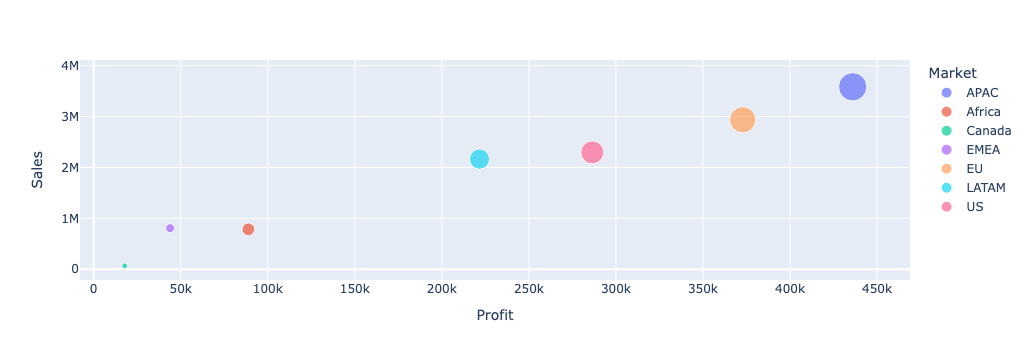

In [157]:
import plotly.express as px
df = pd.read_csv('superstore.csv')
df_copy = df[['Year', 'Market','Country', 'Sales', 'Profit', 'Discount']].copy()

# 그룹화하여 필요한 값 계산
state_sales_profit = df_copy.groupby('Market').sum().reset_index()  # 인덱스를 컬럼으로 되돌림

# 시각화
fig = px.scatter(state_sales_profit, x='Profit', y='Sales', color='Market', size='Profit', hover_data=['Sales'])
fig.show()

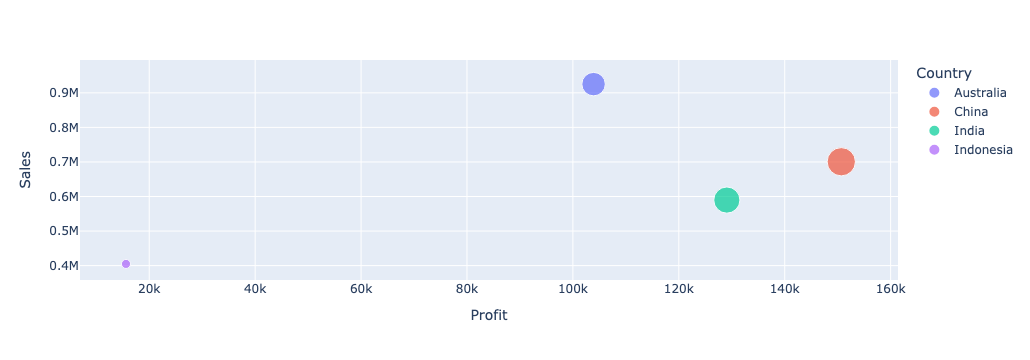

In [159]:
import plotly.express as px
df = pd.read_csv('superstore.csv')
df_copy = df[['Year', 'Market','Country', 'Sales', 'Profit', 'Discount']].copy()

apac_data = df_copy[df_copy['Market'] == 'APAC']

country_sales_profit_apac = apac_data.groupby('Country').sum().reset_index()  # 인덱스를 컬럼으로 되돌림

# 음수 Profit 값을 0으로 설정
country_sales_profit_apac['Profit'] = country_sales_profit_apac['Profit'].clip(lower=0)

top_4_countries = country_sales_profit_apac.nlargest(4, 'Sales')

# 시각화
fig = px.scatter(top_4_countries, x='Profit', y='Sales', color='Country', size='Profit', hover_data=['Sales'])
fig.show()


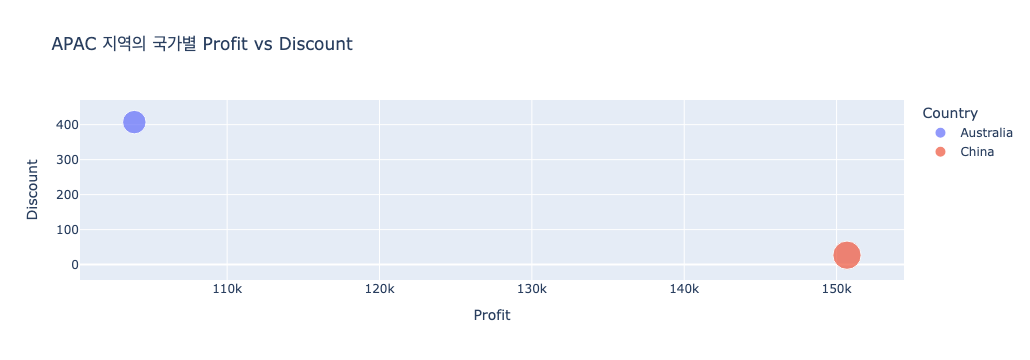

In [163]:
import pandas as pd
import plotly.express as px

# 데이터 불러오기
df = pd.read_csv('superstore.csv')
df_copy = df[['Year', 'Market', 'Country', 'Sales', 'Profit', 'Discount']].copy()

# APAC 데이터 필터링
apac_data = df_copy[df_copy['Market'] == 'APAC']

# 오스트레일리아와 중국만 선택 (올바른 방법)
aus_china = apac_data[apac_data['Country'].isin(['Australia', 'China'])]

# 그룹화하여 국가별 Sales, Profit 합계 계산
country_sales_profit_apac = aus_china.groupby('Country', as_index=False)[['Sales', 'Profit', 'Discount']].sum()

# 음수 Profit 값을 0으로 설정
country_sales_profit_apac['Profit'] = country_sales_profit_apac['Profit'].clip(lower=0)

# 시각화: Profit vs Discount (국가별 크기 비교)
fig = px.scatter(country_sales_profit_apac, x='Profit', y='Discount', color='Country', 
                 size='Profit', hover_data=['Discount'],
                 title="APAC 지역의 국가별 Profit vs Discount")
fig.show()



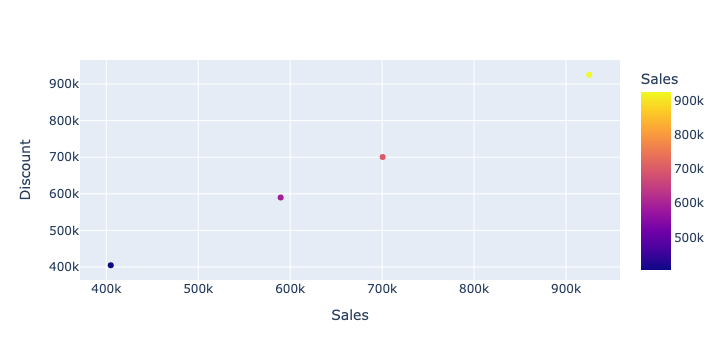

In [351]:
import plotly.express as px

# APAC 시장만 필터링
apac_data = df_notime[df_notime['Market'] == 'APAC']

# APAC 데이터에 대해 그룹화 및 집계
country_sales_profit_apac = apac_data.groupby('Country').sum().reset_index()  # 인덱스를 컬럼으로 되돌림

# 음수 Profit 값을 0으로 설정
country_sales_profit_apac['Discount'] = country_sales_profit_apac['Sales'].clip(lower=0)

top_4_countries = country_sales_profit_apac.nlargest(4, 'Sales')

# 시각화
fig = px.scatter(top_4_countries, x='Sales', y='Discount', color='Sales')
fig.show()

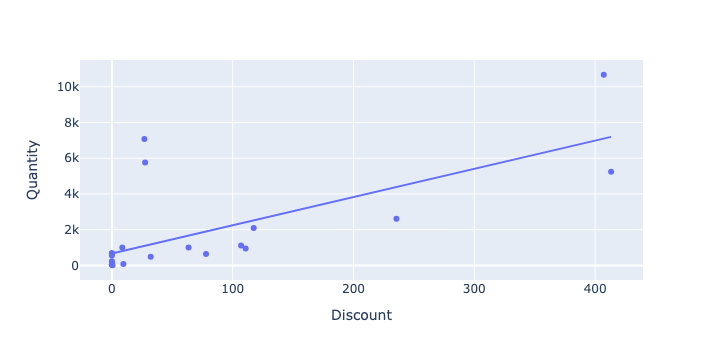

In [392]:
import plotly.express as px

df_notime = df[['Market', 'Country', 'City', 'Category', 'Sub.Category', 'Sales', 'Quantity', 'Discount', 'Profit']].copy()

# APAC 시장만 필터링
apac_data = df_notime[df_notime['Market'] == 'APAC']

# APAC 데이터에 대해 그룹화 및 집계
country_sales_profit_apac = apac_data.groupby('Country').sum().reset_index()  # 인덱스를 컬럼으로 되돌림

fig = px.scatter(country_sales_profit_apac, x="Discount", y="Quantity", trendline="ols")
fig.show()

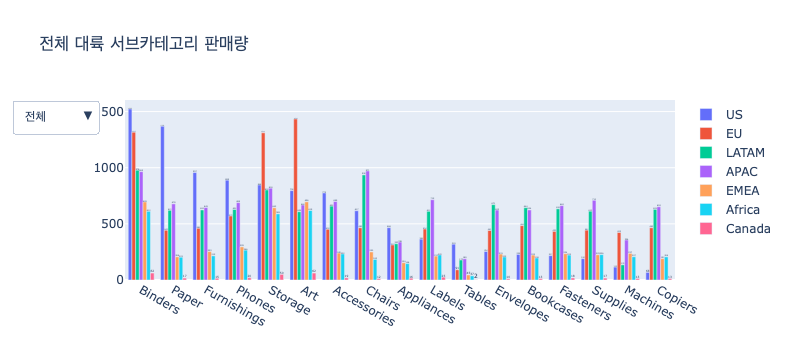

In [341]:
import plotly.graph_objects as go

# 서브카테고리별 판매량 계산
subcategory_sales = df.groupby(['Market', 'Sub.Category']).size().sort_values(ascending=False).to_frame('subcategory sales').reset_index()

# Figure 객체 생성
fig = go.Figure()

# 각 시장별로 데이터 추출하여 트레이스 추가
markets = subcategory_sales["Market"].unique()
for market in markets:
    df_market = subcategory_sales[subcategory_sales["Market"] == market]
    fig.add_trace(
        go.Bar(
            x=df_market["Sub.Category"],
            y=df_market["subcategory sales"],
            name=market,  
            text=df_market['subcategory sales'],
            textposition='outside'
        )
    )

# 버튼을 정의
buttons = [
    {
        "label": "전체",  # "전체" 버튼 클릭 시 모든 대륙의 데이터를 표시
        "method": "update",
        "args": [{"visible": [True] * len(fig.data)}, {"title": "전체 대륙 서브카테고리 판매량"}],
    }
]

# 각 시장에 대해 버튼 추가
for i, market in enumerate(markets):
    visibility = [False] * len(fig.data)  # 처음에는 모든 데이터를 숨김
    visibility[i] = True  # 해당 시장의 데이터를 표시
    buttons.append(
        {
            "label": market,  # 버튼 라벨
            "method": "update",
            "args": [{"visible": visibility}, {"title": f"{market} 서브카테고리 판매량"}],  # 해당 시장만 보이게 업데이트
        }
    )

# 레이아웃 업데이트
fig.update_layout(
    updatemenus=[  # 버튼 메뉴 추가
        {
            "buttons": buttons,  # 정의한 버튼 목록
            "direction": "down",  # 버튼 방향 설정
            "showactive": True,  # 활성화된 버튼 강조
        }
    ],
    barmode="group",  # 바 그래프 그룹화
    title="전체 대륙 서브카테고리 판매량"  # 기본 제목 설정
)

# 그래프 표시
fig.show()


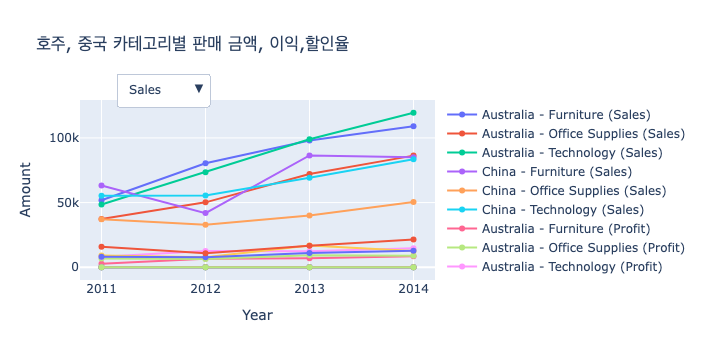

In [368]:
import pandas as pd 
import plotly.graph_objects as go


df = pd.read_csv('superstore.csv')
df = df[['Market', 'Country', 'City', 'Category', 'Sub.Category', 'Sales', 'Quantity', 'Discount', 'Profit','Year']].copy()


aus_china = df[(df.Country=='Australia') | (df.Country=='China')]

aus_china_sp = aus_china_sp.groupby(['Year', 'Country', 'Category']).agg({
        'Discount': 'mean',
        'Profit': 'sum',
        'Sales': 'sum'
    }).reset_index()
aus_china_sp


countries = aus_china_sp['Country'].unique()
categories = aus_china_sp['Category'].unique()
fig = go.Figure()
sales_traces = []
profit_traces = []
for metric in ['Sales', 'Profit','Discount']:
    for country in countries:
        for category in categories:
            subset = aus_china_sp[(aus_china_sp['Country'] == country) & (aus_china_sp['Category'] == category)]
            trace = go.Scatter(
                x=subset['Year'],
                y=subset[metric],
                mode='lines+markers',
                name=f"{country} - {category} ({metric})"
            )
            if metric == "Sales":
                sales_traces.append(trace)
            else:
                profit_traces.append(trace)
fig.add_traces(sales_traces + profit_traces)
total_traces = len(sales_traces) + len(profit_traces)
visible_sales = [True] * len(sales_traces) + [False] * len(profit_traces)
visible_profit = [False] * len(sales_traces) + [True] * len(profit_traces)
dropdown_buttons = [
    {"label": "Sales", "method": "update",
     "args": [{"visible": visible_sales}, {"title": "호주, 중국 카테고리별 판매 금액 평균"}]},
    {"label": "Profit", "method": "update",
     "args": [{"visible": visible_profit}, {"title": "호주, 중국 카테고리별 이익 평균"}]},
    {"label": "Discount", "method": "update",
     "args": [{"visible": visible_sales}, {"title": "호주, 중국 카테고리별 판매 할인 평균"}]}
]
fig.update_layout(
    updatemenus=[{
        "buttons": dropdown_buttons,
        "direction": "down",
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.15,
        "yanchor": "top",
    }],
    title="호주, 중국 카테고리별 판매 금액, 이익,할인율",
    xaxis_title="Year",
    yaxis_title="Amount"
)
fig.show()

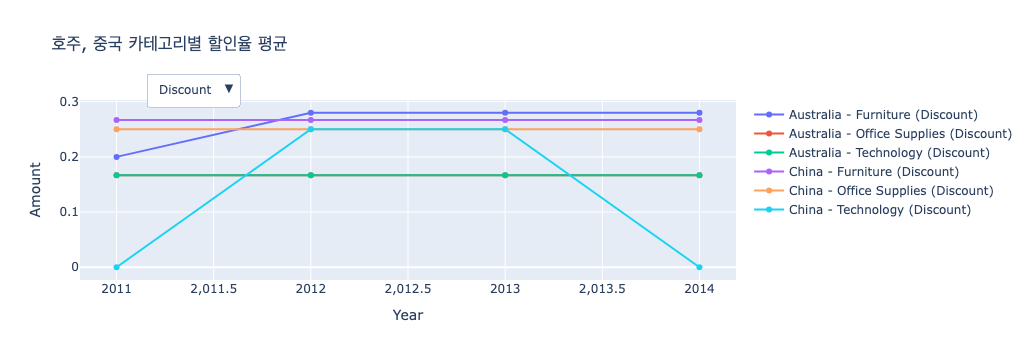

In [372]:
import pandas as pd 
import plotly.graph_objects as go


df = pd.read_csv('superstore.csv')
df = df[['Market', 'Country', 'City', 'Category', 'Sub.Category', 'Sales', 'Quantity', 'Discount', 'Profit','Year']].copy()


aus_china = df[(df.Country=='Australia') | (df.Country=='China')]

aus_china_sp = aus_china_sp.groupby(['Year', 'Country', 'Category']).agg({
        'Discount': 'mean',
        'Profit': 'sum',
        'Sales': 'sum'
    }).reset_index()
aus_china_sp


countries = aus_china_sp['Country'].unique()
categories = aus_china_sp['Category'].unique()
fig = go.Figure()
sales_traces = []
profit_traces = []
for metric in ['Discount']:
    for country in countries:
        for category in categories:
            subset = aus_china_sp[(aus_china_sp['Country'] == country) & (aus_china_sp['Category'] == category)]
            trace = go.Scatter(
                x=subset['Year'],
                y=subset[metric],
                mode='lines+markers',
                name=f"{country} - {category} ({metric})"
            )
            if metric == "Sales":
                sales_traces.append(trace)
            else:
                profit_traces.append(trace)
fig.add_traces(sales_traces + profit_traces)
total_traces = len(sales_traces) + len(profit_traces)
visible_sales = [True] * len(sales_traces) + [False] * len(profit_traces)
visible_profit = [False] * len(sales_traces) + [True] * len(profit_traces)
dropdown_buttons = [
    {"label": "Discount", "method": "update",
     "args": [{"visible": visible_sales}, {"title": "호주, 중국 카테고리별 판매 할인 평균"}]}
]
fig.update_layout(
    updatemenus=[{
        "buttons": dropdown_buttons,
        "direction": "down",
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.15,
        "yanchor": "top",
    }],
    title="호주, 중국 카테고리별 할인율 평균",
    xaxis_title="Year",
    yaxis_title="Amount"
)
fig.show()

In [374]:
df = pd.read_csv('superstore.csv')
df = df[['Market', 'Country', 'City', 'Category', 'Sub.Category', 'Sales', 'Quantity', 'Discount', 'Profit','Year']].copy()


aus_china = df[(df.Country=='Australia') | (df.Country=='China')]

aus_china_sp = aus_china_sp.groupby(['Year', 'Country', 'Category']).agg({
        'Discount': 'mean',
        'Profit': 'sum',
        'Sales': 'sum'
    }).reset_index()
aus_china_sp


Year    Country         Category  Discount     Profit   Sales
0   2011  Australia        Furniture  0.200000   2714.913   51839
1   2011  Australia  Office Supplies  0.166667   6697.407   37287
2   2011  Australia       Technology  0.166667   8104.410   48460
3   2011      China        Furniture  0.266667   9041.133   63223
4   2011      China  Office Supplies  0.250000   8199.750   37183
5   2011      China       Technology  0.000000  15940.500   55295
6   2012  Australia        Furniture  0.280000   6530.076   80404
7   2012  Australia  Office Supplies  0.166667   6460.335   50167
8   2012  Australia       Technology  0.166667  12538.311   73389
9   2012      China        Furniture  0.266667   7661.403   41864
10  2012      China  Office Supplies  0.250000   7803.540   32842
11  2012      China       Technology  0.250000  10768.830   55528
12  2013  Australia        Furniture  0.280000   7043.817   98004
13  2013  Australia  Office Supplies  0.166667   9353.886   72041
14  2013  Australia       Technology  0.166667  12434.076   98925
15  2013      China        Furniture  0.266667  16824.135   86486
16  2013      China  Office Supplies  0.250000  10989.045   40031
17  2013      China       Technology  0.250000  16660.755   69164
18  2014  Australia        Furniture  0.280000   8410.032  108998
19  2014  Australia  Office Supplies  0.166667   8969.463   86302
20  2014  Australia       Technology  0.166667  14650.707  119441
21  2014      China        Furniture  0.266667  12588.249   85044
22  2014      China  Office Supplies  0.250000  12730.725   50398
23  2014      China       Technology  0.000000  21475.020   83533

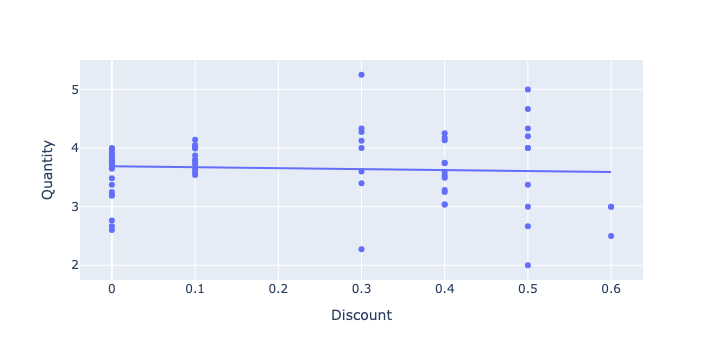

In [70]:
import plotly.express as px
import pandas as pd 

df = pd.read_csv('superstore.csv')
df_copy = df[['Year','Country', 'Category', 'Sales', 'Discount', 'Quantity' ,'Profit']].copy()

aus_china = df_copy[(df.Country=='Australia') | (df.Country=='China')]
aus_china_sp = aus_china.groupby(['Year', 'Country', 'Category','Discount'])[['Quantity','Sales', 'Profit']].mean().reset_index().sort_values('Year')
countries = aus_china_sp['Country'].unique()
categories = aus_china_sp['Category'].unique()

fig = px.scatter(aus_china_sp, x= 'Discount', y= 'Quantity', trendline='ols')
fig.show()


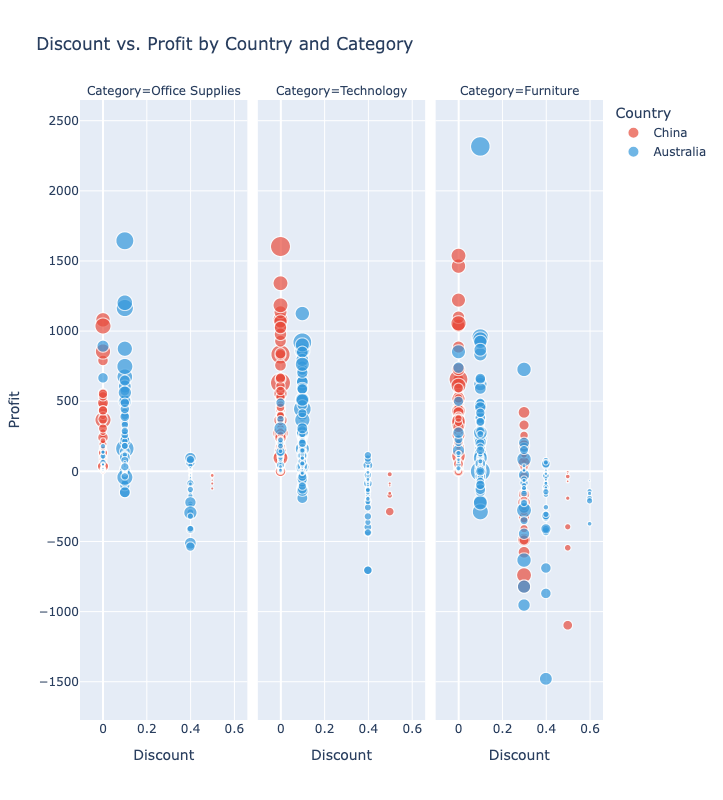

In [631]:
import plotly.express as px
import pandas as pd

# 데이터 불러오기 및 필터링
df = pd.read_csv('superstore.csv')
df_copy = df[['Country', 'Category', 'Sales', 'Discount', 'Quantity', 'Profit']].copy()
df_copy = df_copy[df_copy['Country'].isin(['Australia', 'China'])]  # 호주, 중국 필터링

# 색상 지정 (중국: 빨간색, 호주: 파란색)
color_map = {"China": "#E74C3C", "Australia": "#3498DB"}

# 산점도 생성
fig = px.scatter(df_copy, 
                 x="Discount", y="Profit", 
                 color="Country", 
                 size="Sales", 
                 facet_col="Category",  
                 title="Discount vs. Profit by Country and Category",
                 color_discrete_map=color_map)  # 색상 매핑 적용

# 그래프 크기 및 가독성 개선
fig.update_layout(width=1000, height=800, 
                  font=dict(size=12))  # 폰트 크기 조정

fig.show()



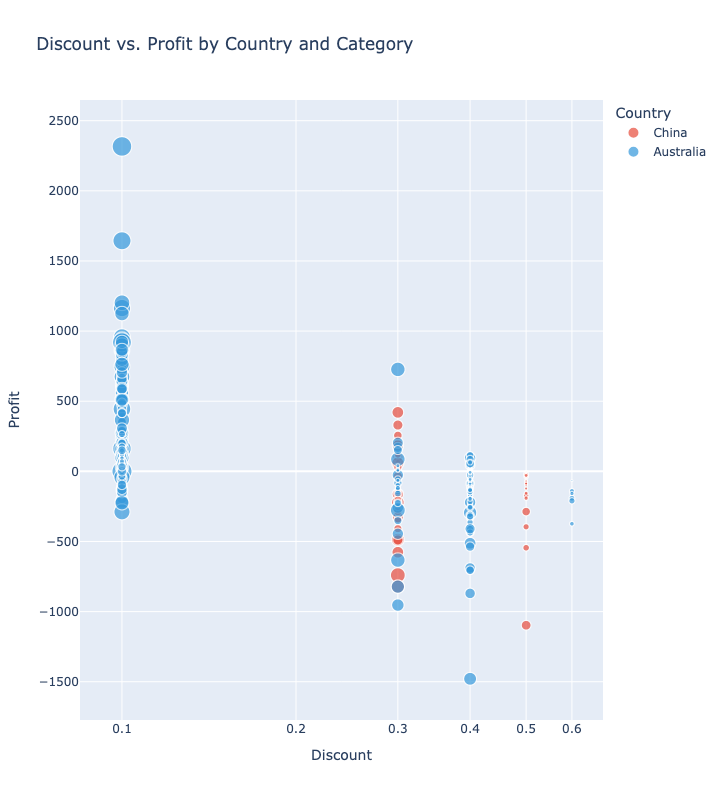

In [81]:
import plotly.express as px
import pandas as pd

# 데이터 불러오기 및 필터링
df = pd.read_csv('superstore.csv')
df_copy = df[['Country', 'Category', 'Sales', 'Discount', 'Quantity', 'Profit']].copy()
df_copy = df_copy[df_copy['Country'].isin(['Australia', 'China'])]  # 호주, 중국 필터링

# 색상 지정 (중국: 빨간색, 호주: 파란색)
color_map = {"China": "#E74C3C", "Australia": "#3498DB"}

discount_bins = [-0.01, 0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35,0.4,0.5,0.6]
df_copy["Discount_Category"] = pd.cut(df_copy["Discount"], bins=discount_bins)

# 산점도 생성
fig = px.scatter(df_copy, 
                 x="Discount", y="Profit", 
                 color="Country", 
                 size="Sales",  
                 title="Discount vs. Profit by Country and Category",
                 color_discrete_map=color_map)  # 색상 매핑 적용

# 그래프 크기 및 가독성 개선
fig.update_layout(width=1000, height=800, 
                  font=dict(size=12))  # 폰트 크기 조정

fig.update_xaxes(type="log")

fig.show()



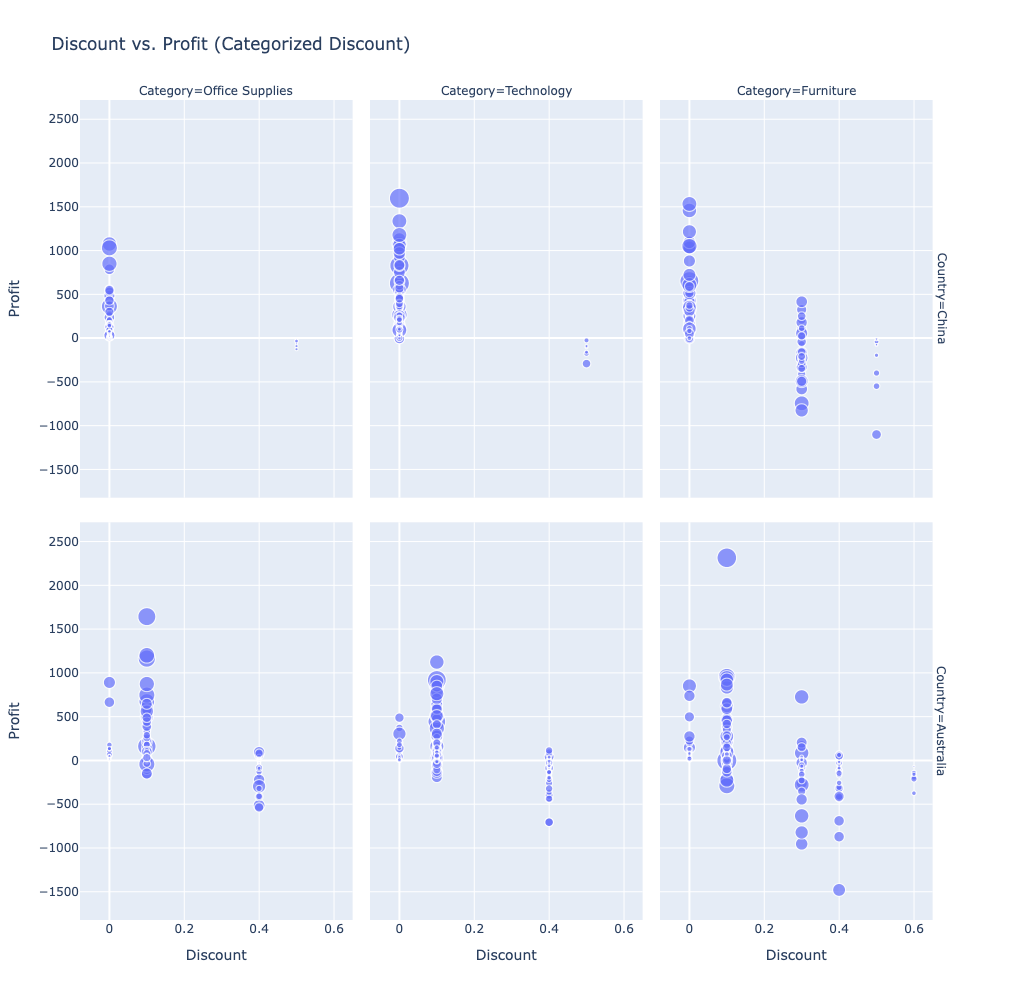

In [4]:
import plotly.express as px
import pandas as pd
import numpy as np

# 데이터 불러오기 및 필터링
df = pd.read_csv('superstore.csv')
df_copy = df[['Country', 'Category', 'Sales', 'Discount', 'Quantity', 'Profit']].copy()
df_copy = df_copy[df_copy['Country'].isin(['Australia', 'China'])]  # 호주, 중국 필터링

# 할인율을 구간화 
discount_bins = [-0.01, 0.05, 0.1,0.15,0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55]
discount_labels = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%", "25-30%", "30-35%", "35-40%", "40-45%", "45-50%", "50+"]

df_copy["Discount_Category"] = pd.cut(df_copy["Discount"], bins=discount_bins, labels=discount_labels)



# 색상 지정 (중국: 빨간색, 호주: 파란색)
color_map = {"China": "#E74C3C", "Australia": "#3498DB"}

# 산점도 생성
fig = px.scatter(df_copy, 
                 x="Discount", y="Profit", 
                 facet_col="Category",  # 국가별 그래프 분리
                 facet_row ="Country",
                 size="Sales",
                 title="Discount vs. Profit (Categorized Discount)",
                 color_discrete_map=color_map)

# 그래프 크기 및 가독성 개선
fig.update_layout(width=1000, height=1000, 
                  font=dict(size=12))

fig.show()


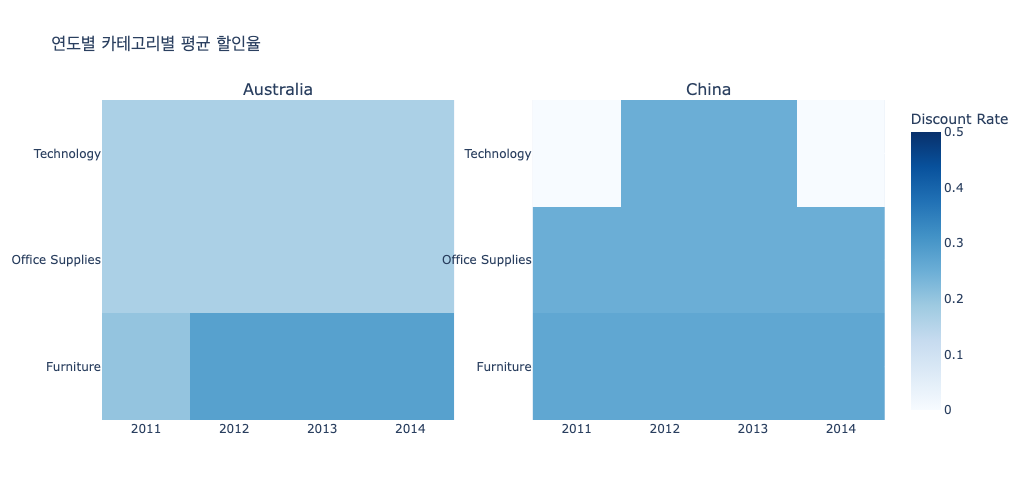

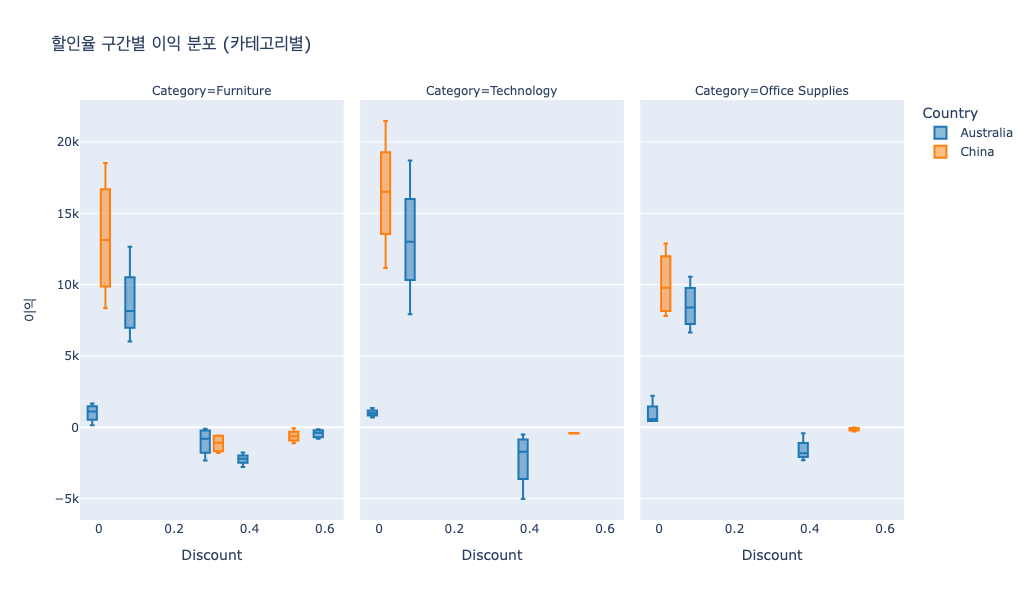

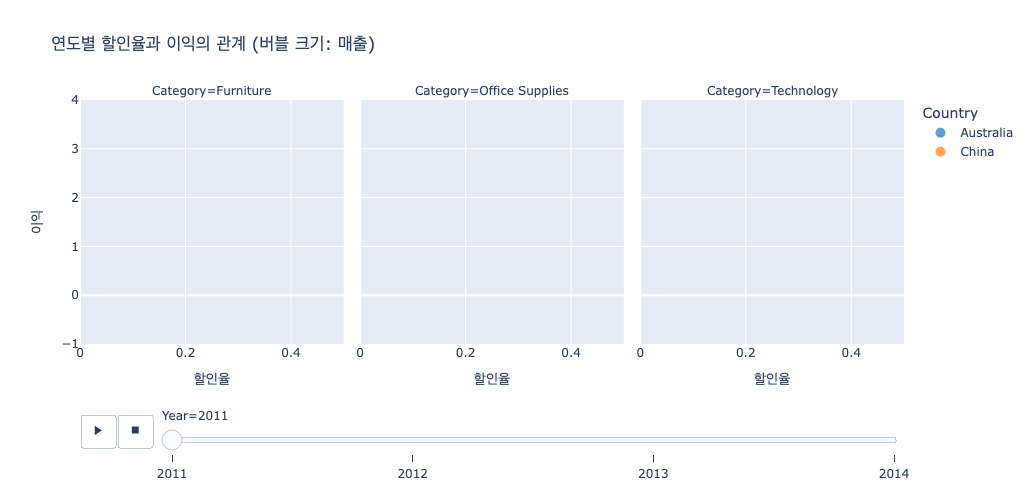

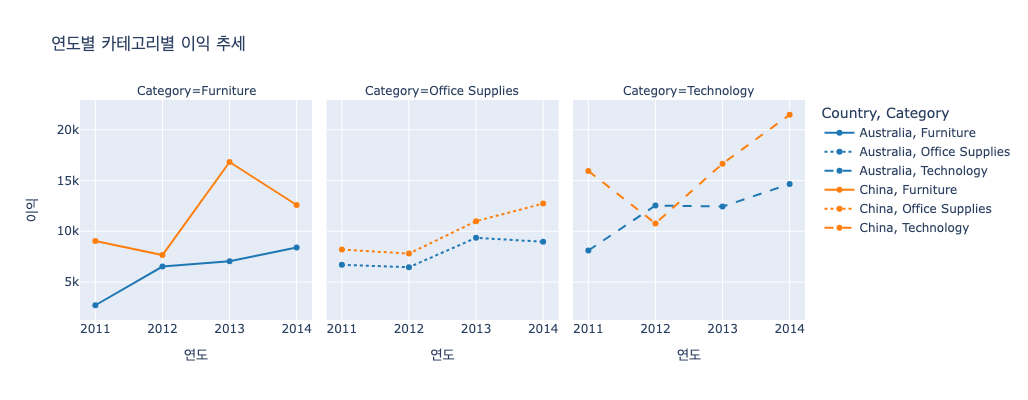

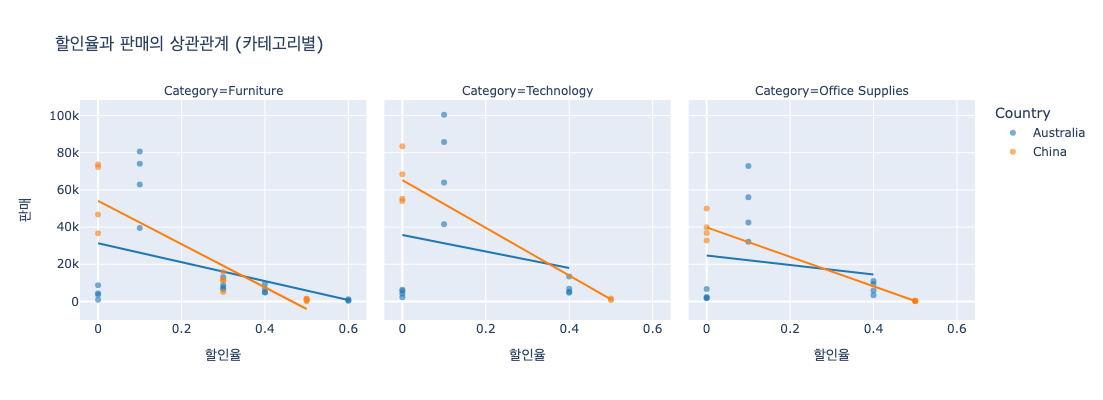

In [358]:
def plot_discount_heatmap():
    # 연도별, 국가별, 카테고리별 평균 할인율 계산
    discount_by_year = aus_china_sp.groupby(['Year', 'Country', 'Category'])['Discount'].mean().reset_index()
    
    # 두 국가를 위한 서브플롯 생성
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Australia', 'China'))
    
    # 각 국가별 히트맵 생성
    for i, country in enumerate(['Australia', 'China']):
        country_data = discount_by_year[discount_by_year['Country'] == country]
        
        # 피벗 테이블 생성
        pivot_data = country_data.pivot(index='Category', columns='Year', values='Discount')
        
        # 히트맵 추가
        fig.add_trace(
            go.Heatmap(
                z=pivot_data.values,
                x=pivot_data.columns,
                y=pivot_data.index,
                colorscale='Blues',
                colorbar=dict(title='Discount Rate') if i == 1 else None,
                showscale=i == 1,
                zmin=0, zmax=0.5
            ),
            row=1, col=i+1
        )
    
    fig.update_layout(
        title_text='연도별 카테고리별 평균 할인율',
        height=500, width=1000
    )
    
    return fig

# 2. 할인율 구간별 이익 분포를 박스플롯으로 시각화
def plot_profit_by_discount():
    fig = px.box(aus_china_sp, x='Discount', y='Profit', color='Country', facet_col='Category',
                 title='할인율 구간별 이익 분포 (카테고리별)',
                 labels={'Discount_Category': '할인율 구간', 'Profit': '이익'},
                 color_discrete_map={'Australia': '#1f77b4', 'China': '#ff7f0e'},
                 width=1000, height=600)
    
    fig.update_layout(boxmode='group')
    return fig

# 3. 연도별 할인율과 이익의 관계를 애니메이션 버블차트로 시각화
def plot_animated_bubble():
    # 연도별, 국가별, 카테고리별 평균 할인율과 총 이익, 총 판매량 계산
    summary = aus_china_sp.groupby(['Year', 'Country', 'Category']).agg({
        'Discount': 'mean',
        'Profit': 'sum',
        'Sales': 'sum',
        'Quantity': 'sum'
    }).reset_index()
    
    # 버블 크기를 위한 Sales 정규화
    summary['Sales_normalized'] = summary['Sales'] / summary['Sales'].max() * 100
    
    fig = px.scatter(summary, 
                     x='Discount', 
                     y='Profit', 
                     size='Sales_normalized',
                     color='Country',
                     animation_frame='Year',
                     animation_group='Category',
                     facet_col='Category',
                     hover_name='Category',
                     hover_data=['Sales', 'Quantity'],
                     labels={'Discount': '할인율', 'Profit': '이익', 'Sales': '매출'},
                     title='연도별 할인율과 이익의 관계 (버블 크기: 매출)',
                     color_discrete_map={'Australia': '#1f77b4', 'China': '#ff7f0e'},
                     width=1000, height=500)
    
    fig.update_layout(
        xaxis=dict(range=[0, 0.5], title='할인율'),
        yaxis=dict(title='이익')
    )
    
    return fig

# 4. 연도별 카테고리별 이익 추세를 라인 차트로 시각화
def plot_profit_trend():
    # 연도별, 국가별, 카테고리별 총 이익 계산
    profit_by_year = aus_china_sp.groupby(['Year', 'Country', 'Category'])['Profit'].sum().reset_index()
    
    fig = px.line(profit_by_year, 
                  x='Year', 
                  y='Profit', 
                  color='Country', 
                  line_dash='Category',
                  facet_col='Category',
                  markers=True,
                  labels={'Year': '연도', 'Profit': '이익'},
                  title='연도별 카테고리별 이익 추세',
                  color_discrete_map={'Australia': '#1f77b4', 'China': '#ff7f0e'},
                  width=1000, height=400)
    
    return fig

# 5. 할인율과 이익의 상관관계를 산점도와 회귀선으로 시각화
def plot_discount_profit_correlation():
    fig = px.scatter(aus_china_sp, 
                     x='Discount', 
                     y='Sales', 
                     color='Country',
                     facet_col='Category',
                     opacity=0.6,
                     trendline='ols',
                     labels={'Discount': '할인율', 'Sales': '판매'},
                     title='할인율과 판매의 상관관계 (카테고리별)',
                     color_discrete_map={'Australia': '#1f77b4', 'China': '#ff7f0e'},
                     width=1000, height=400)
    
    return fig

# 모든 시각화 함수를 실행
discount_heatmap = plot_discount_heatmap()
profit_by_discount = plot_profit_by_discount()
animated_bubble = plot_animated_bubble()
profit_trend = plot_profit_trend()
correlation_plot = plot_discount_profit_correlation()

# 결과 출력

# 각 시각화를 출력하려면 아래 주석을 해제하세요
discount_heatmap.show()
profit_by_discount.show()
animated_bubble.show()
profit_trend.show()
correlation_plot.show()

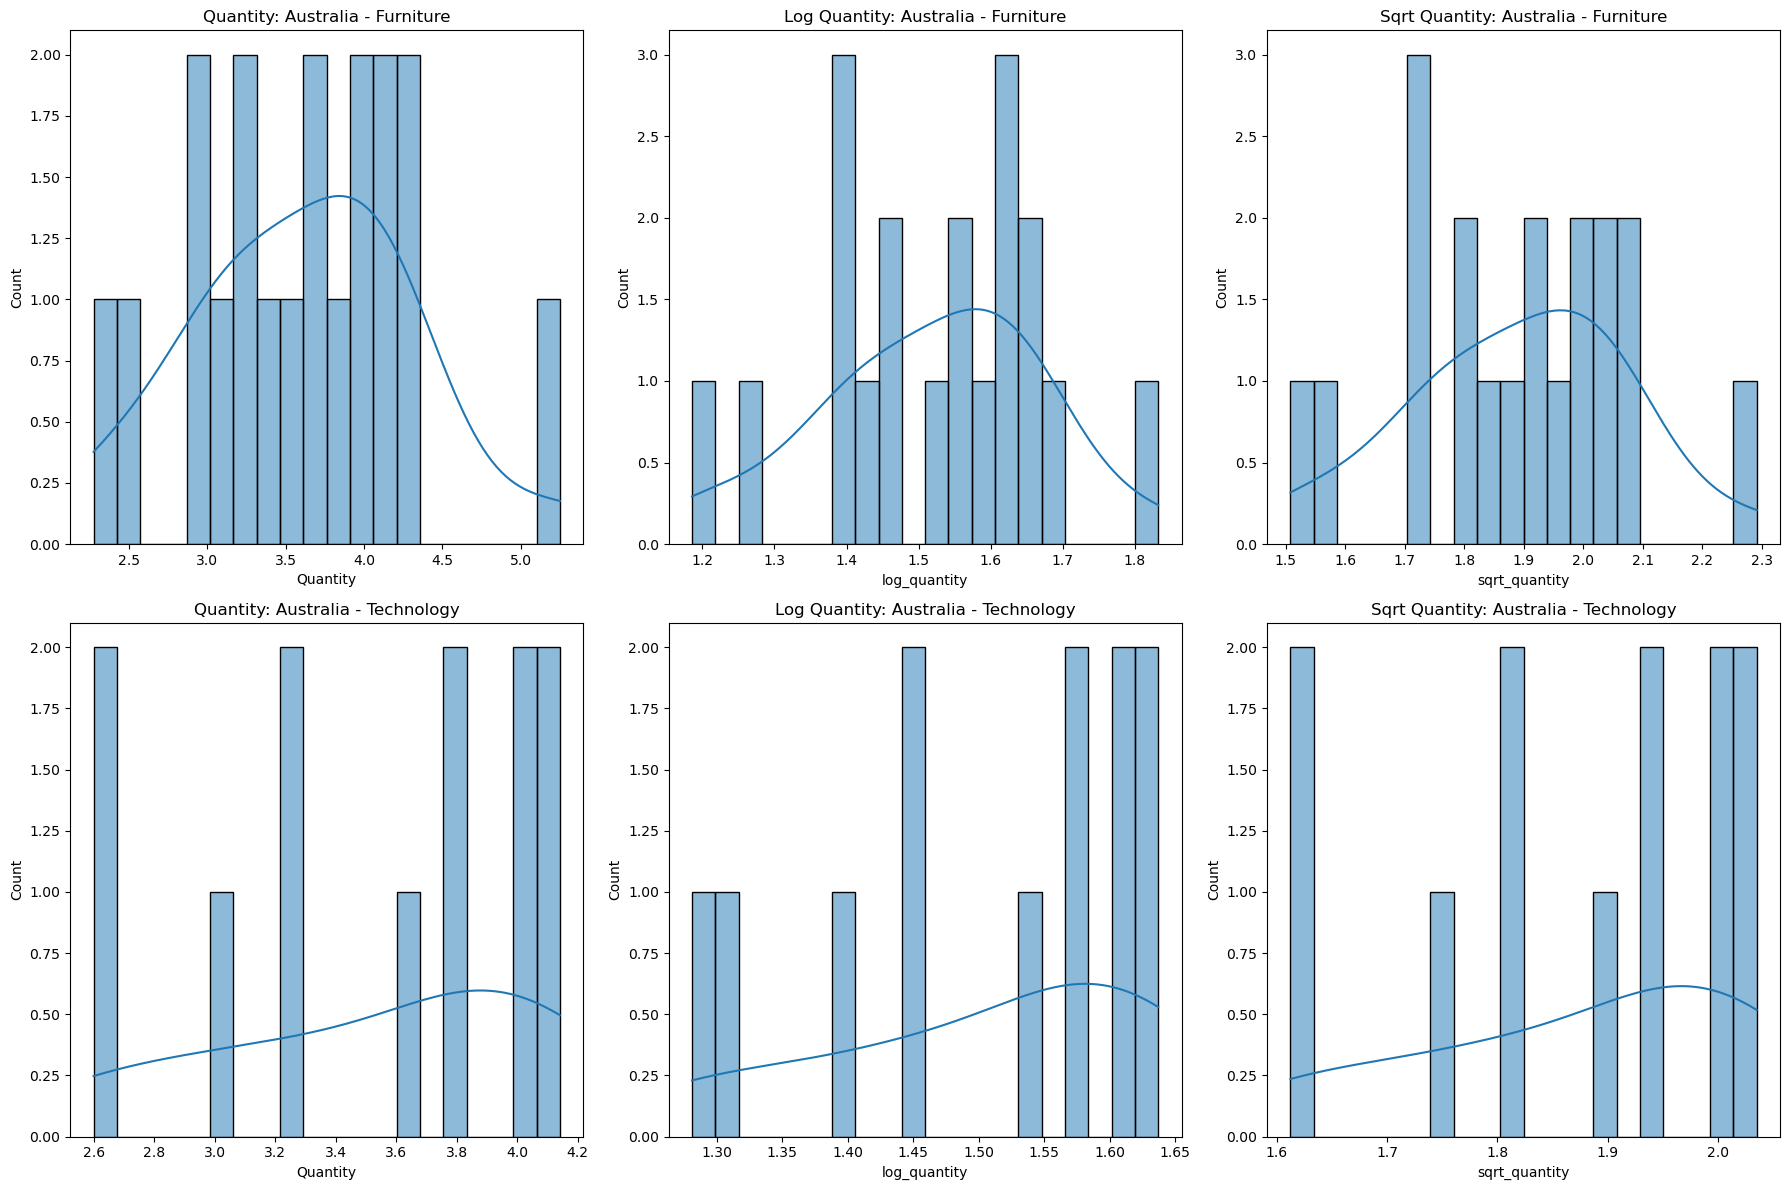

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_price_elasticity():
    # 여러 국가와 카테고리에 대해 subplot을 생성
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()  # 2차원 배열을 1차원으로 변환하여 인덱싱을 간편하게 함
    plot_index = 0  # subplot의 위치 인덱스 초기화

    # 각 국가와 카테고리에 대해 반복
    for country in aus_china_sp['Country'].unique():
        for category in aus_china_sp['Category'].unique():
            subset = aus_china_sp[(aus_china_sp['Country'] == country) & 
                                  (aus_china_sp['Category'] == category)]
            if len(subset) < 5:  
                continue

            subset = subset.copy()

            # 원본 Quantity 분포 히스토그램
            sns.histplot(subset['Quantity'], kde=True, bins=20, ax=axes[plot_index])
            axes[plot_index].set_title(f'Quantity: {country} - {category}')
            plot_index += 1
            if plot_index >= len(axes):  # subplot 공간이 부족하면 break
                plt.tight_layout()
                plt.show()
                return

            # 로그 변환 후 분포 히스토그램
            subset['log_quantity'] = np.log(subset['Quantity'] + 1)  
            sns.histplot(subset['log_quantity'], kde=True, bins=20, ax=axes[plot_index])
            axes[plot_index].set_title(f'Log Quantity: {country} - {category}')
            plot_index += 1
            if plot_index >= len(axes):
                plt.tight_layout()
                plt.show()
                return

            # 제곱근 변환 후 분포 히스토그램
            subset['sqrt_quantity'] = np.sqrt(subset['Quantity'])
            sns.histplot(subset['sqrt_quantity'], kde=True, bins=20, ax=axes[plot_index])
            axes[plot_index].set_title(f'Sqrt Quantity: {country} - {category}')
            plot_index += 1
            if plot_index >= len(axes):
                plt.tight_layout()
                plt.show()
                return

    plt.tight_layout()
    plt.show()

# 함수 실행 (aus_china_sp 데이터프레임이 미리 정의되어 있어야 함)
calculate_price_elasticity()


NameError: name 'alpha_value' is not defined

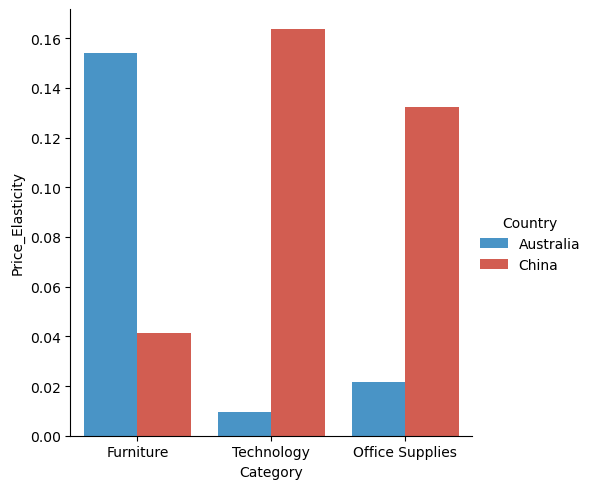

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 탄력성 분석 함수

df = pd.read_csv('superstore.csv')
df_copy = df[['Year','Country', 'Category', 'Sales', 'Discount', 'Quantity' ,'Profit']].copy()

aus_china = df_copy[(df.Country=='Australia') | (df.Country=='China')]
aus_china_sp = aus_china.groupby(['Year', 'Country', 'Category','Discount'])[['Quantity','Sales', 'Profit']].mean().reset_index().sort_values('Year')
countries = aus_china_sp['Country'].unique()
categories = aus_china_sp['Category'].unique()



def calculate_price_elasticity():
    elasticity_results = []
    
    for country in aus_china_sp['Country'].unique():
        for category in aus_china_sp['Category'].unique():
            subset = aus_china_sp[(aus_china_sp['Country'] == country) & 
                                (aus_china_sp['Category'] == category)]
            
            if len(subset) < 5:  # 데이터가 너무 적은 경우 건너뜀
                continue
                
            # 로그 변환
            subset = subset.copy()
            subset['log_quantity'] = np.log(subset['Quantity'] + 1)  # 0 방지
            subset['log_discount_factor'] = np.log(1 - subset['Discount'] + 0.001)  # 0 방지
            
            try:
                # 회귀 분석 (탄력성 모델)
                model = smf.ols('log_quantity ~ log_discount_factor', data=subset).fit()
                
                # 탄력성 값 저장
                elasticity = abs(model.params['log_discount_factor'])
                r2 = model.rsquared
                
                elasticity_results.append({
                    'Country': country,
                    'Category': category,
                    'Price_Elasticity': elasticity,
                    'R2': r2
                })
                
            except Exception as e:
                print(f"Error in elasticity calculation for {country}, {category}: {e}")
                continue

    elasticity_df = pd.DataFrame(elasticity_results)
    
    # 할인 전략 추천
    elasticity_df['Discount_Strategy'] = pd.cut(
        elasticity_df['Price_Elasticity'],
        bins=[0, 0.5, 1.5, float('inf')],
        labels=['낮은 할인(0-10%)', '중간 할인(10-30%)', '높은 할인(30%+)']
    )

    return elasticity_df

# 데이터 분석 실행
elasticity_df = calculate_price_elasticity()

# 색상 설정
color_map = {"China": "#E74C3C", "Australia": "#3498DB"}
category_order = ['Furniture', 'Technology', 'Office Supplies']

# 시각화
g = sns.catplot(
    data=elasticity_df, kind="bar",
    x="Category", y="Price_Elasticity", hue="Country",  # hue 추가 (국가별 색상 구분)
    height=5, aspect=1, palette=color_map, 
    order=category_order  # 카테고리 순서 지정
)
# 각 subplot에서 모든 막대에 대해 투명도 설정
for ax in g.axes.flat:  # FacetGrid 내의 모든 subplot 반복
    for patch in ax.patches:  # subplot 내의 모든 막대 그래프
        patch.set_alpha(alpha_value)  # 투명도 적용
        
# 그래프 제목 추가
g.fig.suptitle("Price Elasticity by Country", fontsize=14)

plt.show()


In [334]:
summary = aus_china_sp.groupby(['Year', 'Country', 'Category']).agg({
        'Discount': 'mean',
        'Profit': 'sum',
        'Sales': 'sum'
    }).reset_index()
summary

Year    Country         Category  Discount     Profit   Sales
0   2011  Australia        Furniture  0.200000   2714.913   51839
1   2011  Australia  Office Supplies  0.166667   6697.407   37287
2   2011  Australia       Technology  0.166667   8104.410   48460
3   2011      China        Furniture  0.266667   9041.133   63223
4   2011      China  Office Supplies  0.250000   8199.750   37183
5   2011      China       Technology  0.000000  15940.500   55295
6   2012  Australia        Furniture  0.280000   6530.076   80404
7   2012  Australia  Office Supplies  0.166667   6460.335   50167
8   2012  Australia       Technology  0.166667  12538.311   73389
9   2012      China        Furniture  0.266667   7661.403   41864
10  2012      China  Office Supplies  0.250000   7803.540   32842
11  2012      China       Technology  0.250000  10768.830   55528
12  2013  Australia        Furniture  0.280000   7043.817   98004
13  2013  Australia  Office Supplies  0.166667   9353.886   72041
14  2013  Australia       Technology  0.166667  12434.076   98925
15  2013      China        Furniture  0.266667  16824.135   86486
16  2013      China  Office Supplies  0.250000  10989.045   40031
17  2013      China       Technology  0.250000  16660.755   69164
18  2014  Australia        Furniture  0.280000   8410.032  108998
19  2014  Australia  Office Supplies  0.166667   8969.463   86302
20  2014  Australia       Technology  0.166667  14650.707  119441
21  2014      China        Furniture  0.266667  12588.249   85044
22  2014      China  Office Supplies  0.250000  12730.725   50398
23  2014      China       Technology  0.000000  21475.020   83533